### <CENTER><h1><u>Final Project</u></CENTER></h1>

<br>

<CENTER>(TEAM CONTRIBUTORS: CHAITANYA DEVARSHI, SHASHANK SHEKHAR, BITTERLEIN KONNOTH BIJU)</CENTER>

-------
-------

===================================================================================================================

<h2><u>Content</u></h2>

1. [Abstract](#1.-Abstract)


2. [Introduction](#2.-Introduction)
  
  2.1 [Methodology](#2.1-Methodology)
  

3. [Data Loading & Preparation](#3.-Data-Loading-&-Preparation)

  3.1 [Read the Data](#3.1-Read-the-Data)  


4. [EDA](#4.-Exploratory-Data-Analysis)
  
  4.1 [Univariate](#4.1-Univariate-Analysis)
  
   - 4.1.1 [For numeric features](#4.1.1-Univariate-Analysis-for-numeric-features)
     
   - 4.1.2 [For Binary features](#4.1.2-Univariate-Analysis-for-Binary-features)
     
  4.2 [Bivariate](#4.2-Bivariate-Analysis)
  
  4.3 [Multivariate](#4.3-Multivariate-Analysis)


5. [Data Cleaning](#5.-Data-Cleaning)

  5.1 [Handling Skewness](#5.1-Handling-Skewness)
  
  5.2 [Handling Outliers](#5.2-Handling-Outliers)


6. [Prepped Data Review](#6.-Prepped-Data-Review)


7. [Dimensionality Reduction](#7.-Dimensionality-Reduction)

  7.1 [Variance Threshold](#7.1-Variance-Threshold)
  
  7.2 [PCA](#7.2-PCA)
  
  7.3 [Forward Feature Selection](#7.3-Forward-Feature-Selection)


8. [Machine Learning Models](#8.-Machine-Learning-Models)

  8.1 [XG Boost](#8.1-XG-Boost)
  
  8.2 [Decision Tree](#8.2-Decision-Tree)
  
  8.3 [Multinomial LogisticRegression](#8.3-Multinomial-LogisticRegression)
  
  
9. [Model Selection](#9.-Model-Selection)


10. [Ensemble Model](#10.-Ensemble-Model)

   10.1 [Result Comparing](#10.1-Comparing-the-results-of-the-ensemble-model-against-individual-models)


11. [Conclusion](#11.-Conclusion)


===================================================================================================================

## 1. Abstract

Heart disease is one of the biggest causes of death worldwide, making it crucial to find better ways to prevent and predict it. This project uses Medicare claims data and machine learning to tackle three key questions: (1) _Can models like XGBoost or neural networks predict which people or groups are at higher risk of heart disease based on demographics and medical history?_ (2) _Can we use clustering methods, like K-means, to group regions with similar heart disease rates and uncover meaningful patterns?_ (3) _Can advanced techniques help us understand the most important factors, such as income, lifestyle, or access to care, that influence heart health across different groups?_
The data, provided by the Centers for Medicare & Medicaid Services (CMS), included information about age, gender, race, location, and health trends. We cleaned the data, selected the best features, and applied machine learning models like XGBoost, decision trees, and multinomial logistic regression. We also built an ensemble model to combine predictions for better accuracy. The results showed XGBoost as the most accurate for identifying high-risk groups, K-means revealed regions with similar health outcomes, and SHAP values pointed to socioeconomic factors and access to healthcare as major drivers of heart disease disparities. This project highlights how machine learning can help improve public health by identifying risks and guiding targeted interventions, especially for underserved communities.


----

<b> [Back to Content](#Content) </b>

## 2. Introduction

Cardiovascular diseases (CVDs), including heart disease and stroke, are the leading causes of death worldwide, causing millions of fatalities each year. In the U.S., they account for nearly 1 in 3 deaths, highlighting the urgent need for better prevention, early detection, and treatment strategies. As the population ages, the impact of these diseases is expected to grow, putting more pressure on healthcare systems.

_The data for this research will be sourced from the Medicare Part D Prescriber Data available at the CDS (Centers for Disease Control and Prevention) website.From 2016 to 2021, CMS collected Medicare and Medicaid claims data, including inpatient/outpatient claims and beneficiary summaries. The CDC’s Division for Heart Disease and Stroke Prevention analyzed this data for health indicators. The data is organized by location, sex, and race/ethnicity._

**Source:** The primary source of data will be the Center for Medicare & Medicaid Services (CMS) , Medicare Claims data Heart Disease & Stroke Prevention, which can be accessed here.https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Center-for-Medicare-Medicaid-Services-CMS-Medicare/iw6q-r3ja/about_data


This dataset is ideal for analyzing healthcare outcomes, particularly in predicting hospitalization rates across demographics and locations for conditions like cardiovascular diseases. It includes temporal, geographic, demographic, and disease-related features, supporting models like regression or time series forecasting. It’s well-suited for studying healthcare disparities and assessing policy impacts over time. These features enable insights into how factors like race, gender, and location influence hospitalization rates.

| Data Set Attribute      | Description                                                                                   |
|:------------------------|:---------------------------------------------------------------------------------------------|
| RowId                   | Unique identifier for each record in the dataset.                                            |
| PriorityArea1           | Priority Area (Million Hearts or None). Indicates relevance to Million Hearts program.     |
| PriorityArea2           | Priority Area (ABCS or None). Indicates relevance to ABCS (Aspirin, Blood Pressure, Cholesterol, Smoking). |
| PriorityArea3           | Priority Area (Healthy People 2020 or None). Indicates relevance to Healthy People 2020 goals. |
| PriorityArea4           | Priority Area (AHA 2020 Goals: Cardiovascular Health Metrics or None). Indicates relevance to AHA 2020 Goals. |
| YearStart               | Represents the year the data point was collected or applies to. It’s essential for time-based analysis (e.g., trends over years) and time series forecasting of hospitalization rates or other health outcomes. |
| LocationAbbr            | The abbreviated name of the location (e.g., state abbreviation like "CA" for California).    |
| LocationDesc            | The full name of the location, such as "California."                                         |
| LocationId              | A unique numerical ID for each location. Together, these attributes allow for geographic analysis of health outcomes, identifying which locations have higher or lower rates, and can be mapped or clustered by region. |
| DataSource              | Identifies where the data was sourced, such as from Medicare or other health agencies. It indicates data credibility and potential differences in data collection methods if multiple sources are included. |
| Class                   | Refers to a broad health category, such as "Cardiovascular Diseases." This provides context on the type of health issue being measured and allows for grouped analysis by health category. |
| Topic                   | A more specific health topic within each class, like "Major Cardiovascular Disease." It refines the analysis, helping to identify specific subtypes or aspects of the broader health category. |
| Question                | Describes the specific health measure, such as "Hospitalization rate for cardiovascular disease." This is the core measure being recorded and directly relates to the target variable, Data_Value. |
| Data_Value              | The main outcome or target variable, typically representing a hospitalization rate, rate of occurrence, or other health-related metrics. This numeric value is the key measurement analyzed or predicted in most models. |
| Data_Value_Alt          | An alternative version of the Data_Value, possibly adjusted for factors like age or gender. It may be used for comparison or model robustness checks if it provides an adjusted measure of the outcome. |
| Data_Value_Type         | Specifies how Data_Value was calculated (e.g., "crude rate" or "age-adjusted rate").        |
| Data_Value_Unit         | Specifies the measurement unit, like "per 1,000 people." These define the measurement context and can be important for comparing different data values appropriately. |
| Low_Confidence_Limit    | Lower bound of the confidence interval for Data_Value. Indicates the uncertainty in the measurement. |
| High_Confidence_Limit   | Upper bound of the confidence interval for Data_Value. Also reflects uncertainty.             |
| Break_Out_Category      | Indicates the demographic grouping (e.g., "Gender" or "Race").                             |
| Break_Out               | Provides the specific category (e.g., "Male" or "Female" for gender). Together, they support demographic analysis, allowing insights into how hospitalization rates vary by different demographic groups. |
| ClassId                 | Unique identifier for the Class variable.     |
| TopicId                 | Unique identifier for the Topic variable.                         |
| QuestionId              | Unique identifier for the Question variable.          |
| BreakOutCategoryId      | Unique identifier for the Break_Out_Category variable.          |
| BreakOutId              | Unique identifier for the Break_Out variable.              |
| GeoLocation             | Geographic coordinates (latitude and longitude) for each location, enabling spatial analysis. This allows for visualization on a map and the use of geospatial techniques to identify regional health patterns or hotspots. |


----

<b> [Back to Content](#Content) </b>

## 2.1 Methodology

<h3><u> To address this Final Project, we will follow these below steps :- </u></h3>

1. **Load the dataset**: Upload the `Center_for_Medicare___Medicaid_Services__CMS____Medicare_Claims_data_20241126.csv` file from the DAV 6150 Github Repository.

2. **Read the dataset**: Using a Jupyter Notebook, read the dataset from the respective Github repository and load it into a Pandas DataFrame.

3. **Perform EDA**: Carry out Exploratory Data Analysis to examine the dataset's structure and understand the variables.

4. **Identify and rectify issues**: Detect data quality and integrity issues such as missing values or outliers during EDA, and take appropriate actions to address them.

5. **Prepped Data Review**: Here, we will cross check every thing and will make sure our data is ready for further analysis.

6. **Feature Scale, Selection & Dimensionality Reduction**: Applying feature selection techniques and perform dimensionality reduction to prepare the data for modeling.

7. **Machine Learning Models** :Explain and present our XGBoost, Decision Tree, and Multinomial Logistic Regression modeling work, for a set of explanatory variables.

8. **Models Selection**: Among the three models XGBoost, Decision Tree, and Multinomial Logistic Regression we will evaluate their performance to make our judgment and select the best-performing model.

9. **Ensemble Model**  : Constructing our ensemble model comprised of appropriate “weak learners” relative to the type of response variable we are attempting to estimate.

10. **Conclusion**: We will conclude our work.

----

<b> [Back to Content](#Content) </b>

## 3. Data Loading & Preparation

In [1]:
# Dependencies installation. 

! pip install pandas
! pip install numpy
! pip install statsmodels
! pip install scipy
! pip install sklearn
! pip install xgboost
! pip install tensorflow
! pip install matplotlib
! pip install seaborn
! pip install plotly
! pip install missingno
! pip install mlxtend
! pip install shap
! pip install shapash

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Importing basic Libraries.

import pandas as pd
import numpy as np

# Importing Libraries for statistical analysis.

import statsmodels.api as sm
from scipy import stats

# Importing Libraries for machine learning models.

import sklearn
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import PoissonRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD



# Importing Libraries for plotting the graphs.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


# Importing Libraries for Standarising and Normalising.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import Library for PCA

from sklearn.decomposition import PCA


# Import missingno library for checking on missing values.

import missingno as msno


# Importing train_test_split .

from sklearn.model_selection import train_test_split, cross_val_score, KFold


# Importing Library for imputing null values.

from sklearn.impute import KNNImputer


# Importing filterwarnings from warnings to ignore warnings.

import warnings
warnings.filterwarnings("ignore")

----

<b> [Back to Content](#Content) </b>

### 3.1 Read the Data

In [3]:
# Loading the data from the github repository DAV-6150.

final_project = pd.read_csv("https://raw.githubusercontent.com/bitterlein-biju/DAV-6150-/refs/heads/main/Center_for_Medicare___Medicaid_Services__CMS____Medicare_Claims_data_20241126.csv")
df = final_project.copy()

df.head()

,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,NaN,2016,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,NaN,2017,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,NaN,2018,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,NaN,2019,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,NaN,2020,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [4]:
# Identifing how many rows and columns the dataframe consist of.

df.shape

(33454, 30)

-  The dataset consists of **33454 rows** and **30 columns**.

In [5]:
# Getting a concise summary of the DataFrame .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33454 entries, 0 to 33453
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowId                       0 non-null      float64
 1   YearStart                   33454 non-null  int64  
 2   LocationAbbr                33454 non-null  object 
 3   LocationDesc                33454 non-null  object 
 4   DataSource                  33454 non-null  object 
 5   PriorityArea1               0 non-null      float64
 6   PriorityArea2               0 non-null      float64
 7   PriorityArea3               0 non-null      float64
 8   PriorityArea4               0 non-null      float64
 9   Class                       33454 non-null  object 
 10  Topic                       33454 non-null  object 
 11  Question                    33454 non-null  object 
 12  Data_Value_Type             33454 non-null  object 
 13  Data_Value_Unit             334

**Dataset observation:**



- Index ranges from 0-33453.

- Total number of attributes are 30.

- Where 11 are 'float' and 17 are 'object' and 2 integer.




In [6]:
# checking the unique values
df['YearStart'].unique()


array([2016, 2017, 2018, 2019, 2020, 2021])

- We observed that these values are categorical ordinal values, so we will be changing the data type from int to object for better analysis.

In [7]:
# checking the unique values
df['LocationId'].unique()

array([59, 30, 46, 32,  8, 48, 50, 49, 44, 23, 15, 16, 41, 22, 39, 19, 29,
       31, 36, 25, 37, 10,  4, 35, 53, 24, 42,  5, 12, 20, 13, 27, 47,  9,
        1, 34, 28, 17, 54, 56, 33, 38, 21, 18, 51, 11, 45, 26,  6, 40, 55,
        2])

- We observed that these values are categorical nominal values, so we will be changing the data type from int to object for better analysis.

In [8]:
# Changing datatypes.

df['YearStart'] = df['YearStart'].astype('object')
df['LocationId'] = df['LocationId'].astype('object')

----

<b> [Back to Content](#Content) </b>

# 4. Exploratory Data Analysis

In [9]:
# Sanity check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33454 entries, 0 to 33453
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowId                       0 non-null      float64
 1   YearStart                   33454 non-null  object 
 2   LocationAbbr                33454 non-null  object 
 3   LocationDesc                33454 non-null  object 
 4   DataSource                  33454 non-null  object 
 5   PriorityArea1               0 non-null      float64
 6   PriorityArea2               0 non-null      float64
 7   PriorityArea3               0 non-null      float64
 8   PriorityArea4               0 non-null      float64
 9   Class                       33454 non-null  object 
 10  Topic                       33454 non-null  object 
 11  Question                    33454 non-null  object 
 12  Data_Value_Type             33454 non-null  object 
 13  Data_Value_Unit             334

In [10]:
# Checking for null valus

df.isnull().sum()

,0
RowId,33454
YearStart,0
LocationAbbr,0
LocationDesc,0
DataSource,0
PriorityArea1,33454
PriorityArea2,33454
PriorityArea3,33454
PriorityArea4,33454
Class,0


- we have null values in some features

In [11]:
# Checking for duplicate values.

df.duplicated().sum()

0

-  We have No duplicates values

In [12]:
# Dropping row id column column since it is a unique identifier and has no value in it.

df.drop(columns=['RowId'], inplace=True)

In [13]:
# Selecting columns to drop.

columns_to_drop = [
    'PriorityArea1',
    'PriorityArea2',
    'PriorityArea3',
    'PriorityArea4',
    'Data_Value_Footnote_Symbol',
    'Data_Value_Footnote'

]

df = df.drop(columns=columns_to_drop, axis=1)

- We inquired about the null values with the data provider in columns such as PriorityArea1, PriorityArea2, PriorityArea3, PriorityArea4, DataValueFootNote, and DataValueFootnoteSymbol. This was the reply from them through email and phone call

- **"Thank you for your inquiry. These datasets supported the Division’s Data, Trends, and Maps online tool which was retired in March 2024. The datasets remain available as some users still access them, but they are no longer updated. Blank or none is correct for the 4 columns the query relates to: priorityarea1, priorityarea2, priorityarea3, and priorityarea4. The retired tool combined data across different datasets and sometimes columns were included that were relevant to one dataset but not all.**
Thank you,
Marilyn
DHDSP Inbox.

- By phone call they told the same information about the DataValueFootNote, and DataValueFootnoteSymbol attribute
- By email we got the above response

**Note:** Therefore we decided to drop those columns.


----

<b> [Back to Content](#Content) </b>

 ### 4.1 Univariate Analysis

In [14]:
# Create function to plot dist and box plot for all the numeric features.

def box_dist_plot(df , column):


    """

    This function is to plot box-plot and distribution-plot for a given column,
    column's median value, with count and percentage of null values.

    Parameters :-
        df : Dataframe           # df contains Dataframe.
        column : str             # Column name which is to be ploted.

    """

    plt.style.use('ggplot')

    plt.figure(figsize=(18, 7))

    # Box plot.
    plt.subplot(121)
    sns.boxplot(y = df[column])  # Create box plot
    plt.title(f'Box Plot of : {column}')

    # Distribution plot.
    plt.subplot(122)
    sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
    plt.title(f'Distribution Plot of : {column}')

    # Adjusting the layout.
    plt.tight_layout()

    plt.show()

    # To print statistics.
    print(df[column].describe())
    print('Median :', df[column].median())
    print()
    print('Total Number of null values :', df[column].isnull().sum(), 'count,',
          round(df[column].isnull().mean() * 100, 2), '%')

----

<b> [Back to Content](#Content) </b>

### 4.1.1 Univariate Analysis for numeric features

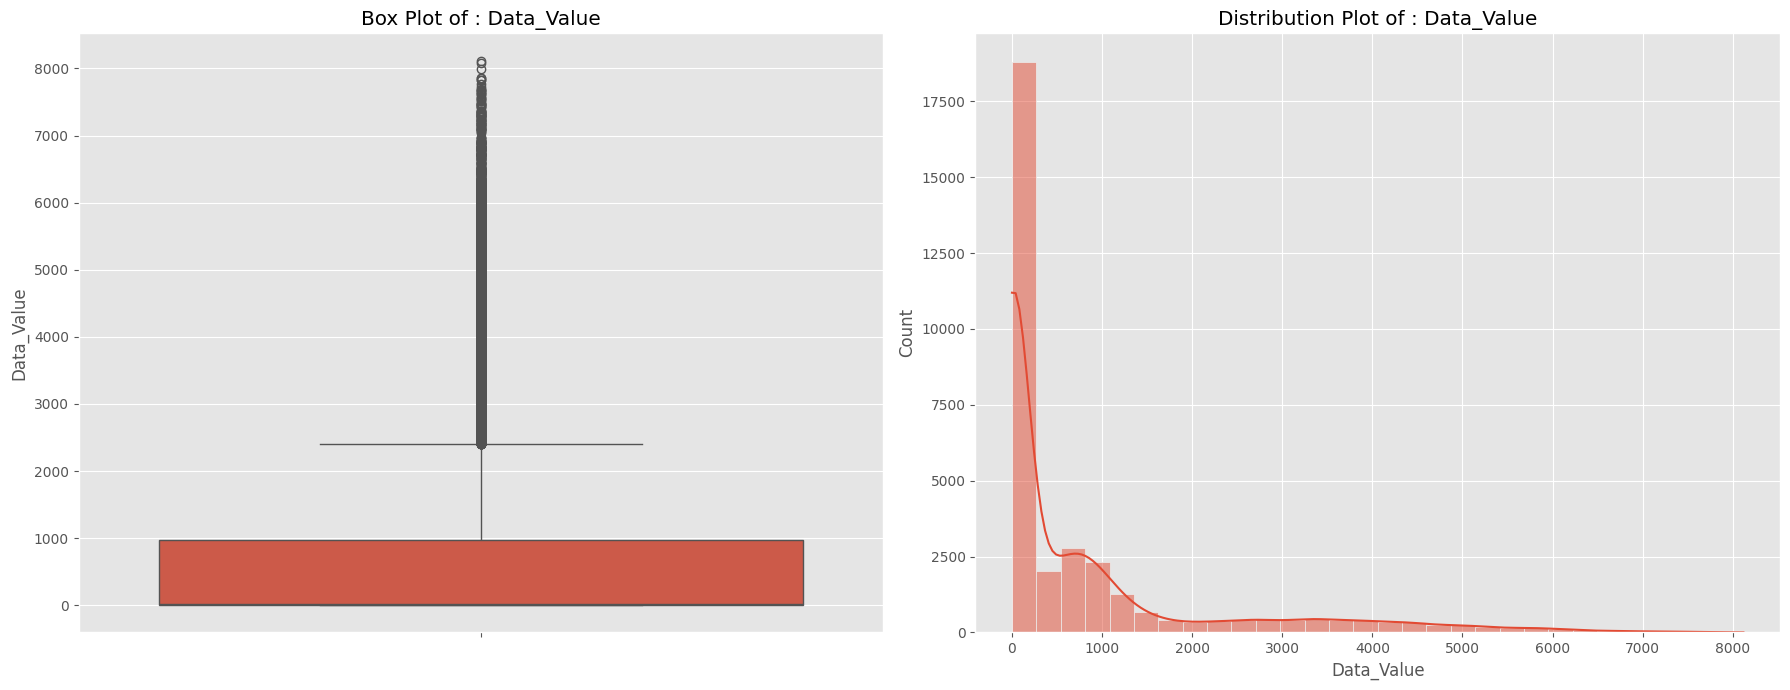

count    33454.000000
mean       845.082732
std       1429.196520
min          0.000000
25%          5.100000
50%         25.000000
75%        965.500000
max       8118.200000
Name: Data_Value, dtype: float64
Median : 25.0

Total Number of null values : 0 count, 0.0 %


In [15]:
# Calling the function.

box_dist_plot(df,'Data_Value')

- Data_Value represents our target variable which we will be transforming in the data cleaning section. The data is right skewed contains outliers, and has a no null values.

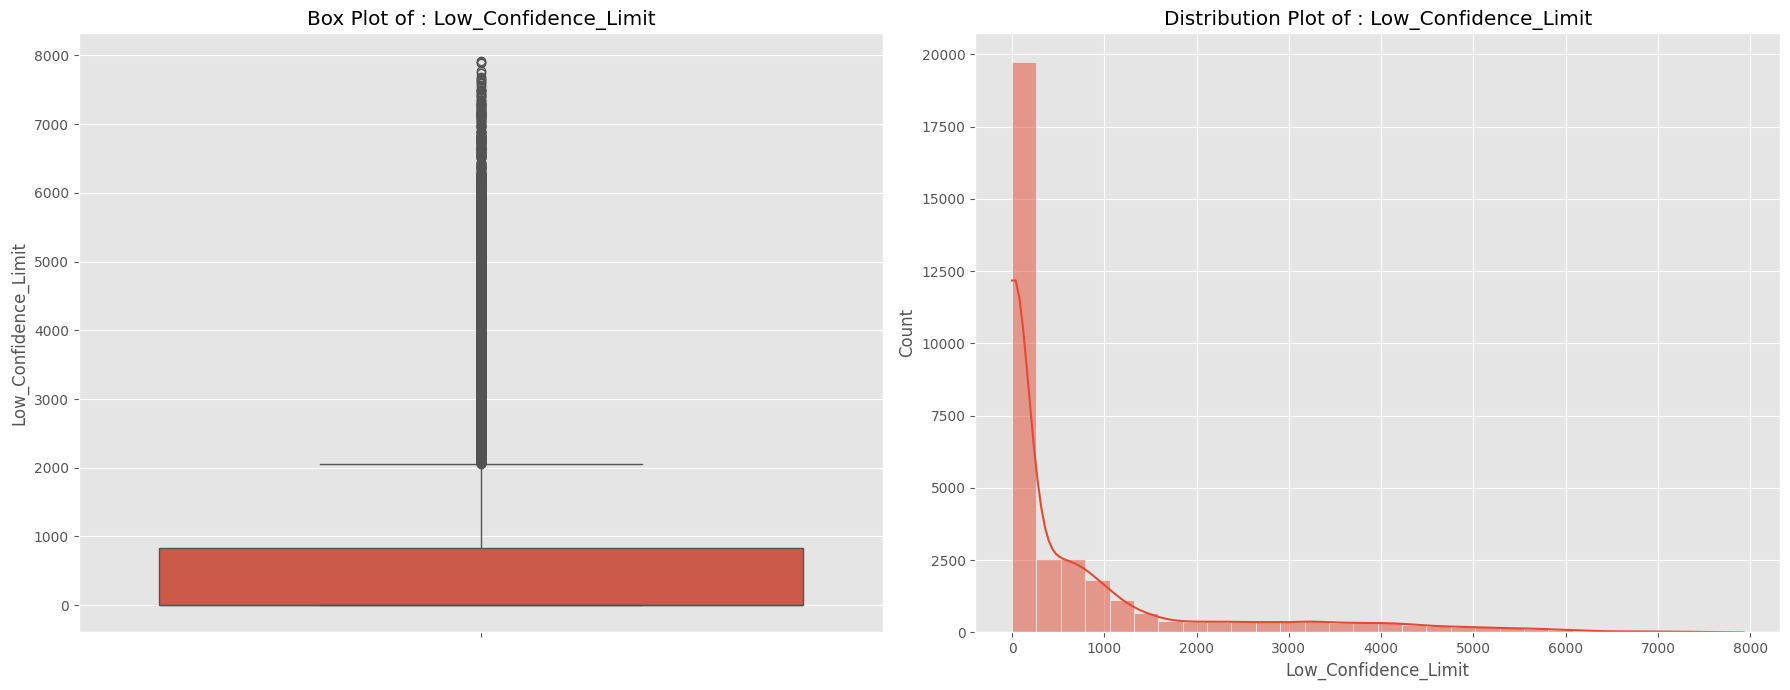

count    33454.00000
mean       742.43715
std       1336.20007
min         -1.00000
25%          3.50000
50%          8.30000
75%        825.90000
max       7925.80000
Name: Low_Confidence_Limit, dtype: float64
Median : 8.3

Total Number of null values : 0 count, 0.0 %


In [16]:
# Calling the function.

box_dist_plot(df,'Low_Confidence_Limit')

- Low_Confidence_Limit represents the 95% confidence interval lower bound The data is right skewed contains outliers, and has a no null values.

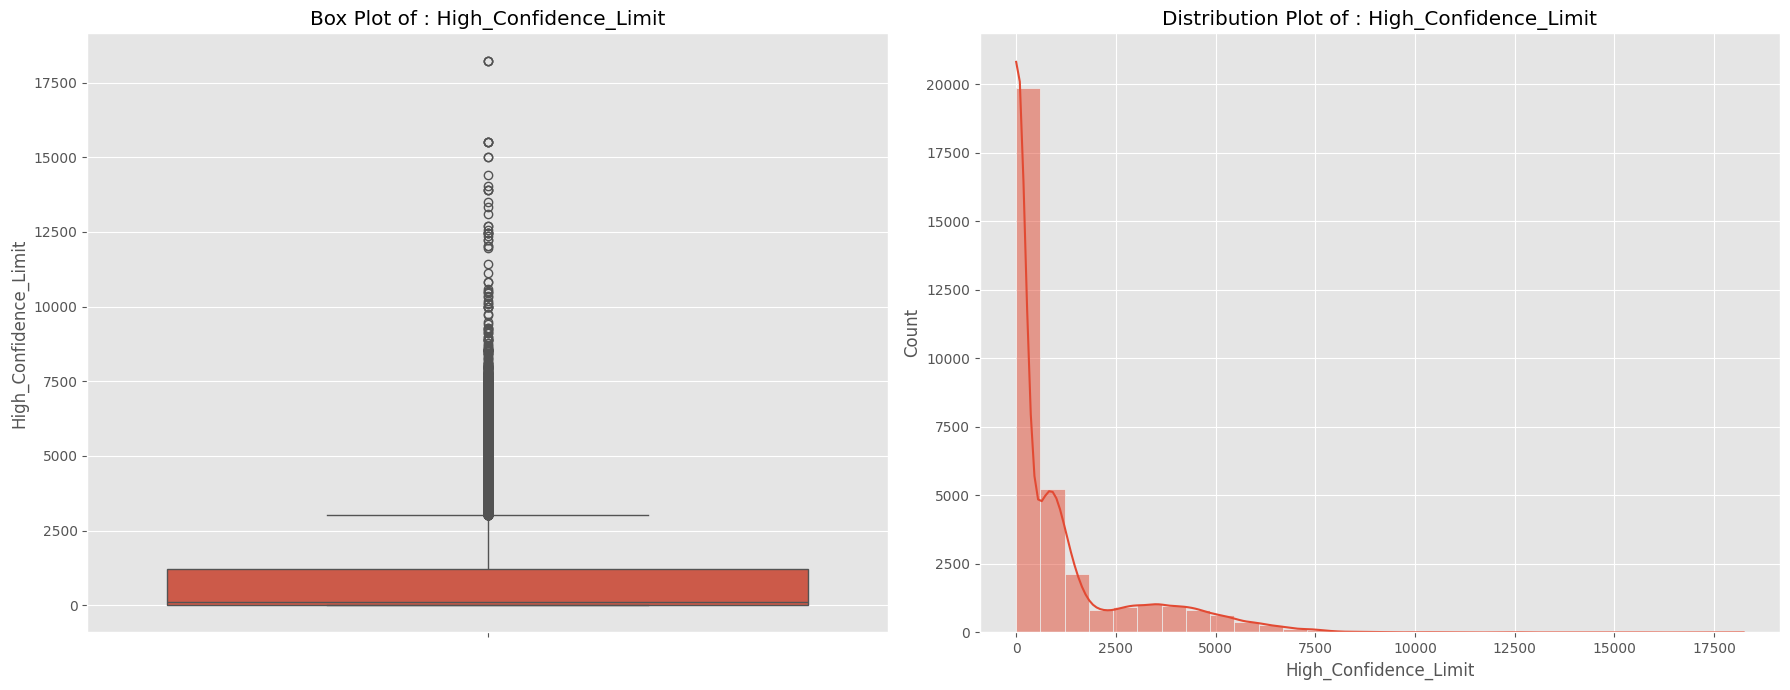

count    33454.000000
mean      1027.837431
std       1673.773902
min         -1.000000
25%          7.200000
50%         92.500000
75%       1212.150000
max      18238.600000
Name: High_Confidence_Limit, dtype: float64
Median : 92.5

Total Number of null values : 0 count, 0.0 %


In [17]:
# Calling the function.

box_dist_plot(df,'High_Confidence_Limit')

- High_Confidence_Limit represents 	 the 95% confidence interval upper bound The data is right skewed contains outliers, and has a no null values.

In [18]:
# Calling the function.

df['GeoLocation'].unique()

array([nan, 'POINT (-109.4244206 47.06652897)',
       'POINT (-100.3735306 44.35313005)',
       'POINT (-117.0718406 39.49324039)',
       'POINT (-106.1336109 38.84384076)',
       'POINT (-99.42677021 31.82724041)',
       'POINT (-72.51764079 43.62538124)',
       'POINT (-111.5871306 39.36070017)',
       'POINT (-71.52247031 41.70828019)',
       'POINT (-68.98503134 45.25422889)',
       'POINT (-157.8577494 21.30485044)',
       'POINT (-114.36373 43.68263001)',
       'POINT (-120.1550313 44.56744942)',
       'POINT (-92.44568007 31.31266064)',
       'POINT (-82.40426006 40.06021014)',
       'POINT (-93.81649056 42.46940091)',
       'POINT (-92.56630005 38.63579078)',
       'POINT (-99.36572062 41.64104099)',
       'POINT (-75.54397043 42.82700103)',
       'POINT (-72.08269067 42.27687047)',
       'POINT (-79.15925046 35.46622098)',
       'POINT (-75.57774117 39.00883067)',
       'POINT (-111.7638113 34.86597028)',
       'POINT (-106.240581 34.52088095)',
       'P

- On analyzing the geolocation, it has two floating-point values in it and a string value written as "POINT." We will split the values into latitude and longitude and then remove the value "POINT in the next step

In [19]:
# Extracting latitude and longitude as floats from the 'GeoLocation' column.

df['Latitude'] = df['GeoLocation'].str.extract(r'POINT \(([-\d.]+) ').astype('float64')
df['Longitude'] = df['GeoLocation'].str.extract(r'POINT \([-?\d.]+ ([-\d.]+)\)').astype('float64')



# Checking the data types to confirm.

print(df[['Longitude', 'Latitude']].dtypes)

Longitude    float64
Latitude     float64
dtype: object


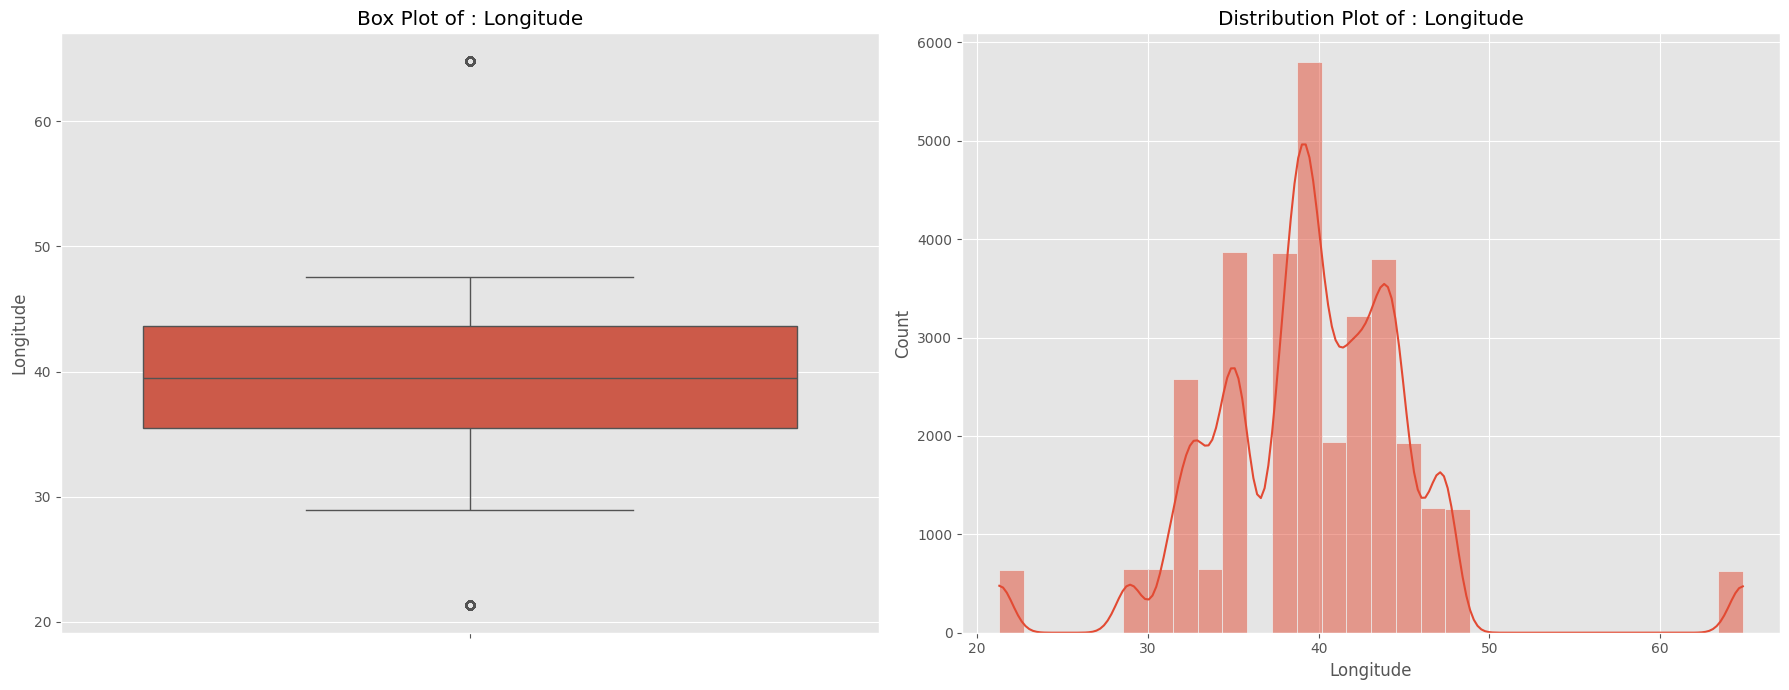

count    32734.000000
mean        39.664278
std          6.211501
min         21.304850
25%         35.472031
50%         39.493240
75%         43.625381
max         64.845080
Name: Longitude, dtype: float64
Median : 39.49324039

Total Number of null values : 720 count, 2.15 %


In [20]:
# Calling the function.

box_dist_plot(df,'Longitude')

- Longitude represents  the longitude of the location.The data is normally distributed  contains one outliers, and has  null values.

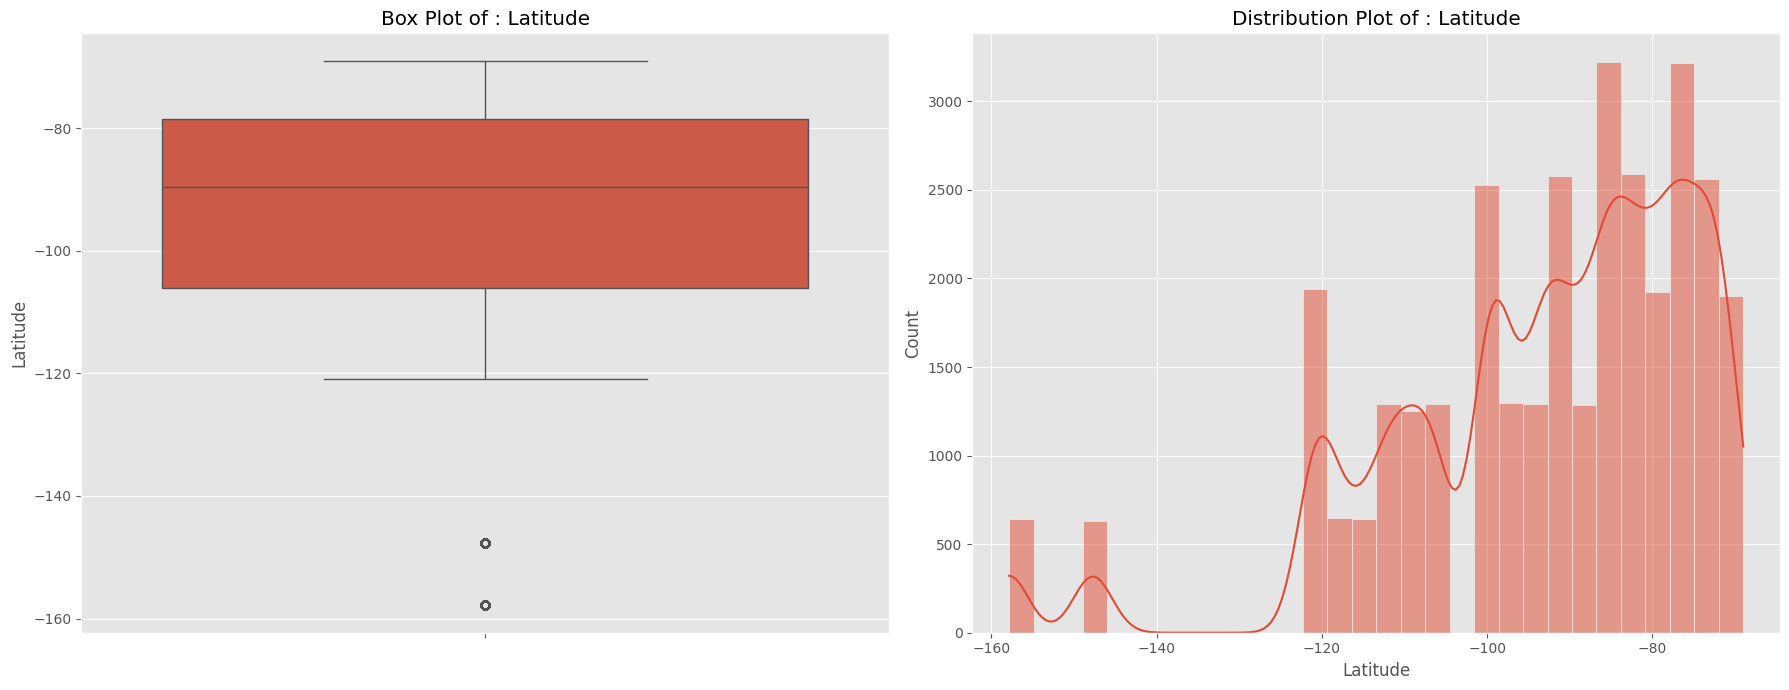

count    32734.000000
mean       -93.372358
std         18.812191
min       -157.857749
25%       -106.133611
50%        -89.538031
75%        -78.457890
max        -68.985031
Name: Latitude, dtype: float64
Median : -89.53803082

Total Number of null values : 720 count, 2.15 %


In [21]:
# Calling the function.

box_dist_plot(df,'Latitude')

- Latitude represents  the latitude of the location.The data is left-skewed  contains  outliers, and has  null values.

----

<b> [Back to Content](#Content) </b>

### 4.1.2 Univariate Analysis for Binary features

In [22]:
# Generates a count plot and displays the count of each category for a specified column in the dataframe.

def plot_category_counts(df, column):

    """
    A function to plot a countplot and  displays the count of each category
    for a specified column in the dataframe.

        column : str
        The name of the categorical column to plot and count.
    """

    # Count plot for the specified column.
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")


    # Set plot labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Count of {column}')

    # Display the plot
    plt.show()

    # Display count of each category
    counts = df[column].value_counts()
    print(f"\nCounts for {column}:\n{counts}")

    #For unique count of input
    unique_count = df[column].nunique()
    print(f"\nUnique for {column}:\n{unique_count}")

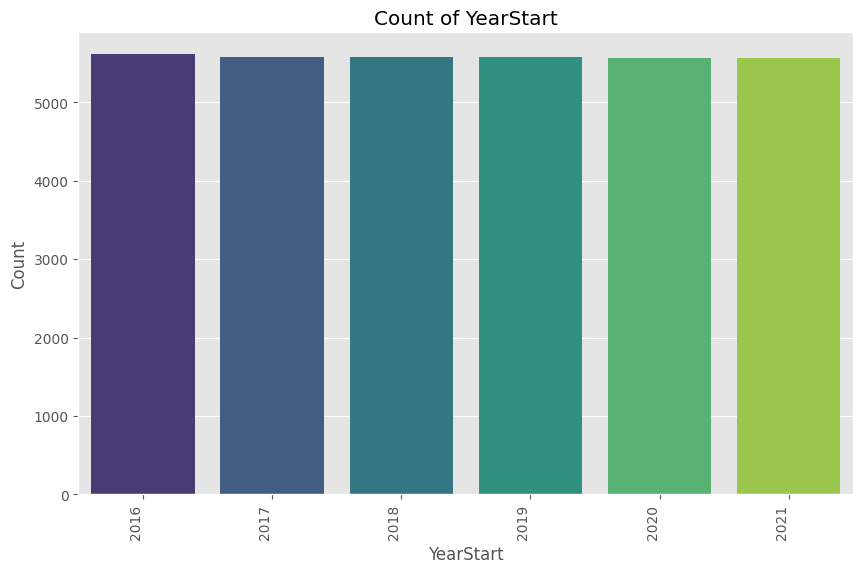


Counts for YearStart:
YearStart
2016    5609
2017    5577
2019    5575
2018    5572
2020    5561
2021    5560
Name: count, dtype: int64

Unique for YearStart:
6


In [23]:
# Calling the function.

plot_category_counts(df, 'YearStart')

- YearStart represents the year of the record. It is clear from the above plot that it has only six unique values, ranging from 2016 to 2021, with 2016 having the highest count.

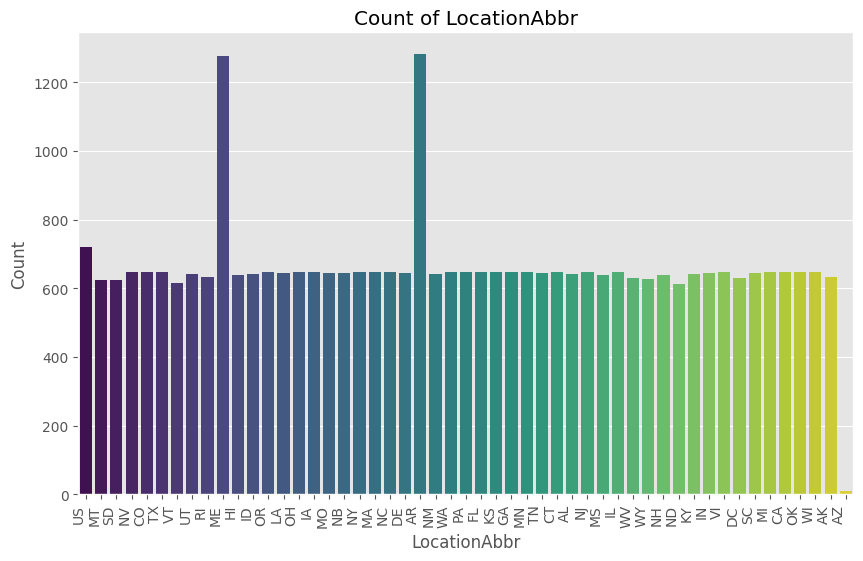


Counts for LocationAbbr:
LocationAbbr
AR    1281
ME    1278
US     720
NC     648
MA     648
NY     648
FL     648
KS     648
GA     648
OH     648
CT     648
NJ     648
IL     648
CA     648
TX     648
CO     648
WA     648
MN     647
VI     647
MI     647
OK     647
WI     647
PA     647
IA     647
OR     647
NV     647
TN     646
IN     645
SC     644
DE     644
NB     644
MO     644
LA     644
KY     643
UT     643
AL     642
NM     641
ID     641
HI     640
NH     639
MS     639
RI     634
AK     632
WV     630
DC     630
WY     627
MT     625
SD     623
VT     617
ND     614
AZ       9
Name: count, dtype: int64

Unique for LocationAbbr:
51


In [24]:
# Calling the function.

plot_category_counts(df, 'LocationAbbr')

- LocationAbbr represents each state in the USA and has 51 unique values. AR and ME have the highest count compared to other states.

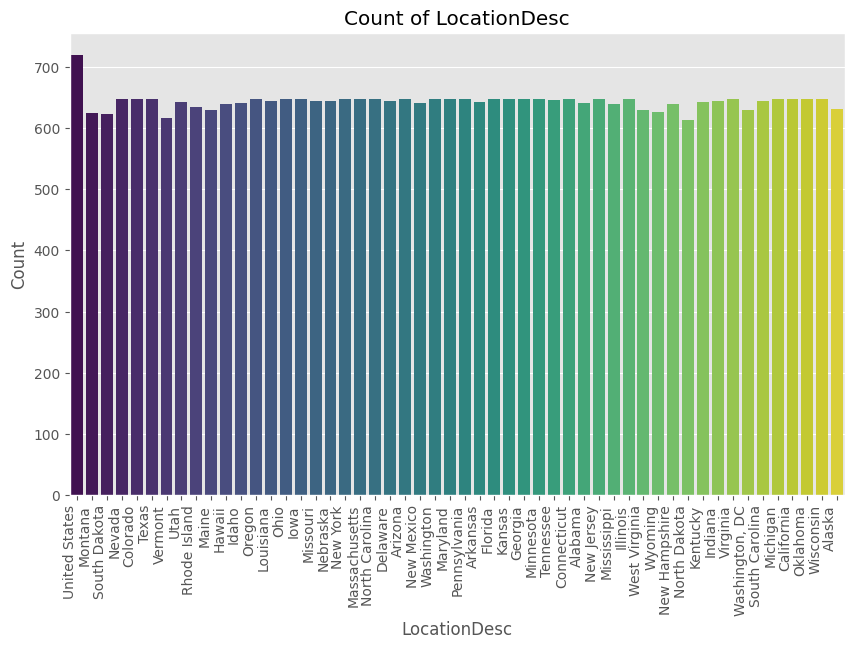


Counts for LocationDesc:
LocationDesc
United States     720
New Jersey        648
North Carolina    648
Massachusetts     648
New York          648
Maryland          648
Florida           648
Kansas            648
Ohio              648
Georgia           648
Connecticut       648
Illinois          648
California        648
Texas             648
Colorado          648
Washington        648
Arizona           647
Minnesota         647
Virginia          647
Michigan          647
Oklahoma          647
Wisconsin         647
Pennsylvania      647
Nevada            647
Iowa              647
Oregon            647
Tennessee         646
Indiana           645
Delaware          644
Nebraska          644
Missouri          644
Louisiana         644
South Carolina    644
Kentucky          643
Arkansas          643
Utah              643
Alabama           642
New Mexico        641
Idaho             641
Hawaii            640
Mississippi       639
New Hampshire     639
Rhode Island      634
Alaska         

In [25]:
# Calling the function.

plot_category_counts(df, 'LocationDesc')

- LocationDesc represents each state in the USA and has 52 unique values. United states having the highest count compared to other values.

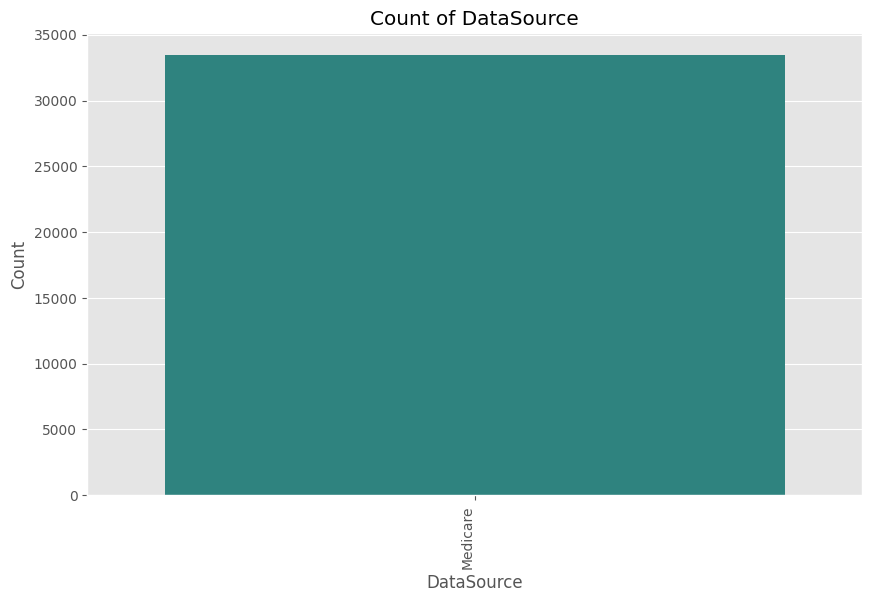


Counts for DataSource:
DataSource
Medicare    33454
Name: count, dtype: int64

Unique for DataSource:
1


In [26]:
# Calling the function.

plot_category_counts(df, 'DataSource')

- The data source represents where the data or records came from. It contains only one unique value, which is medicare.

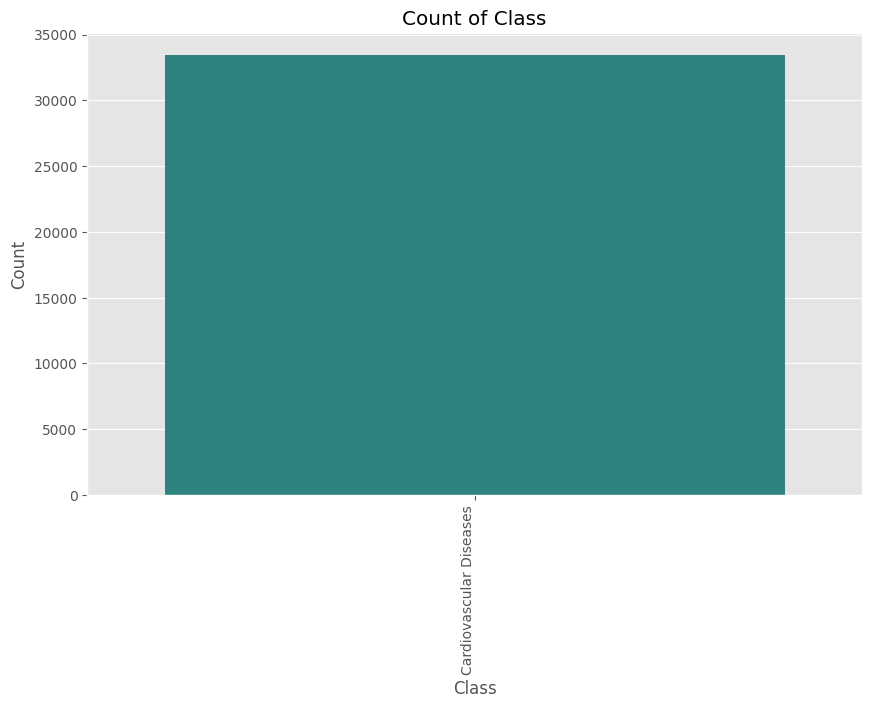


Counts for Class:
Class
Cardiovascular Diseases    33454
Name: count, dtype: int64

Unique for Class:
1


In [27]:
# Calling the function.

plot_category_counts(df, 'Class')

- The Class represents the class description, which has only one unique value Cardiovascular Diseases.

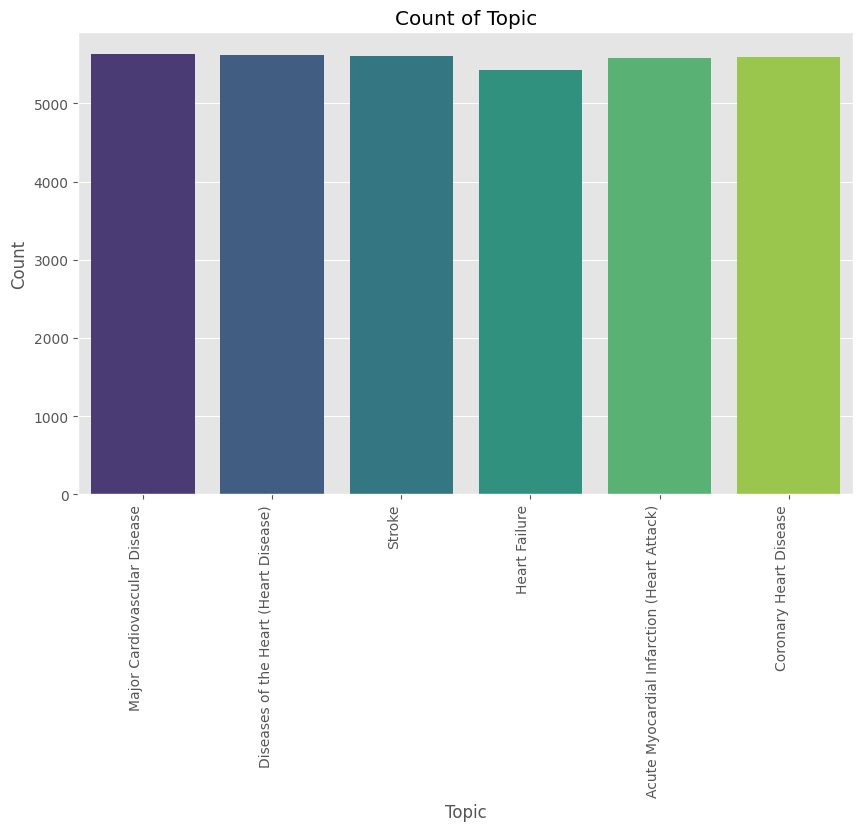


Counts for Topic:
Topic
Major Cardiovascular Disease                  5626
Diseases of the Heart (Heart Disease)         5620
Stroke                                        5606
Coronary Heart Disease                        5593
Acute Myocardial Infarction (Heart Attack)    5584
Heart Failure                                 5425
Name: count, dtype: int64

Unique for Topic:
6


In [28]:
# Calling the function.

plot_category_counts(df, 'Topic')

- The topic represents different types of topics and has 6 unique values, with Major Cardiovascular Disease having the highest count compared to other classes.

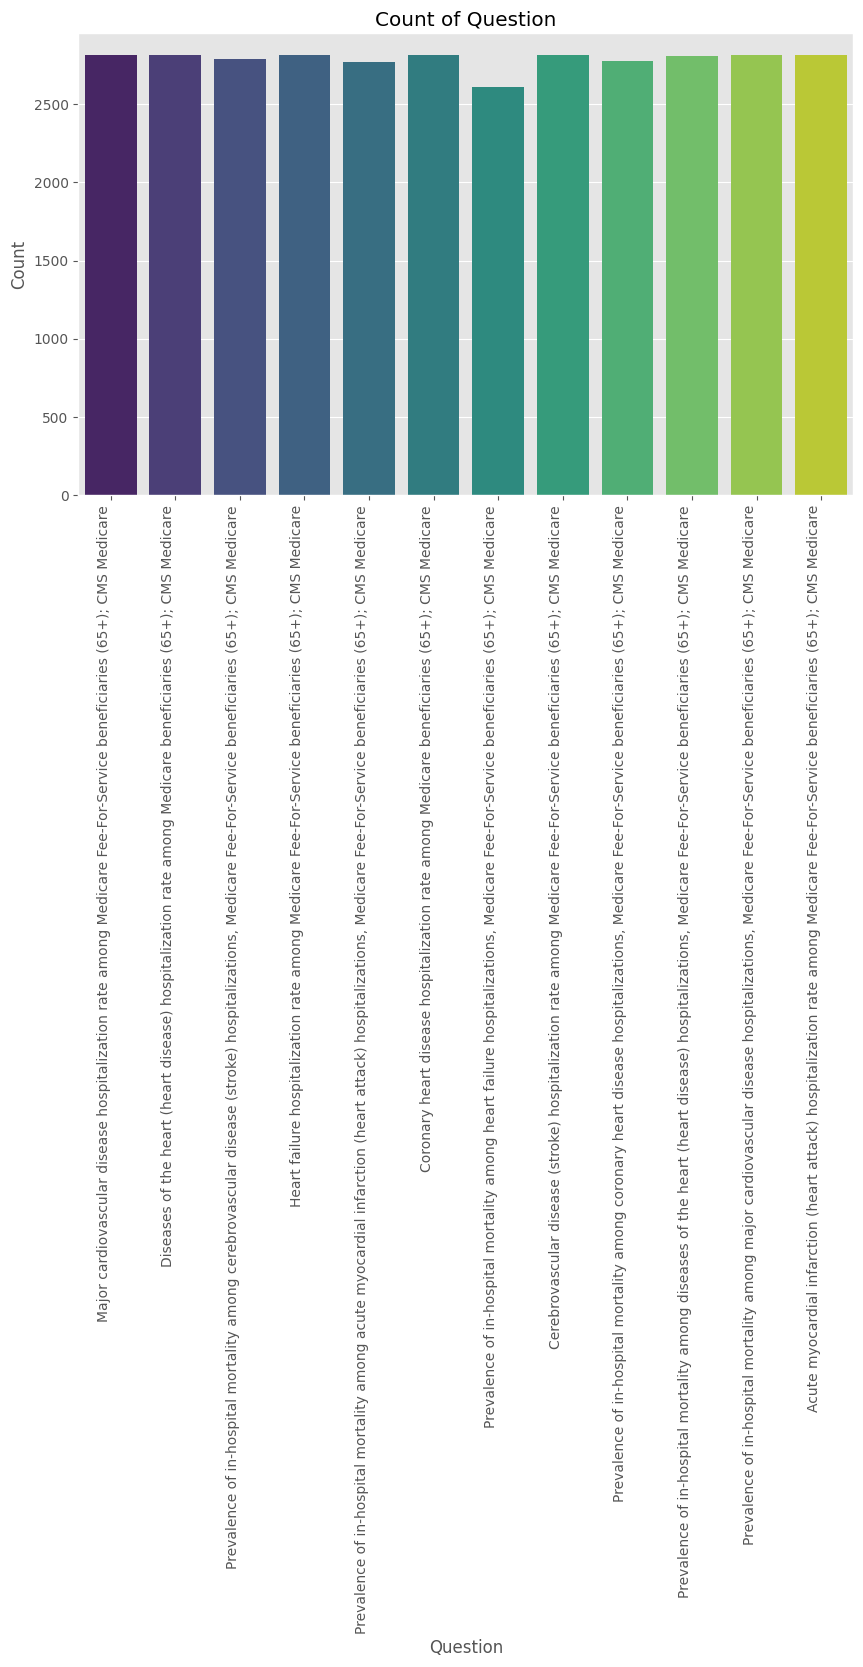


Counts for Question:
Question
Major cardiovascular disease hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare                                                   2814
Diseases of the heart (heart disease) hospitalization rate among Medicare beneficiaries (65+); CMS Medicare                                                          2814
Heart failure hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare                                                                  2814
Coronary heart disease hospitalization rate among Medicare beneficiaries (65+); CMS Medicare                                                                         2814
Cerebrovascular disease (stroke) hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare                                               2814
Acute myocardial infarction (heart attack) hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS

In [29]:
# Calling the function.

plot_category_counts(df, 'Question')

- The questions represents diifernet types of questions which has 12 uniquevalues with   **Major cardiovascular disease hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare**,                                   **Diseases of the heart (heart disease) hospitalization rate among Medicare beneficiaries (65+); CMS Medicare**,                
**Heart failure hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare** has highest count.                                                                


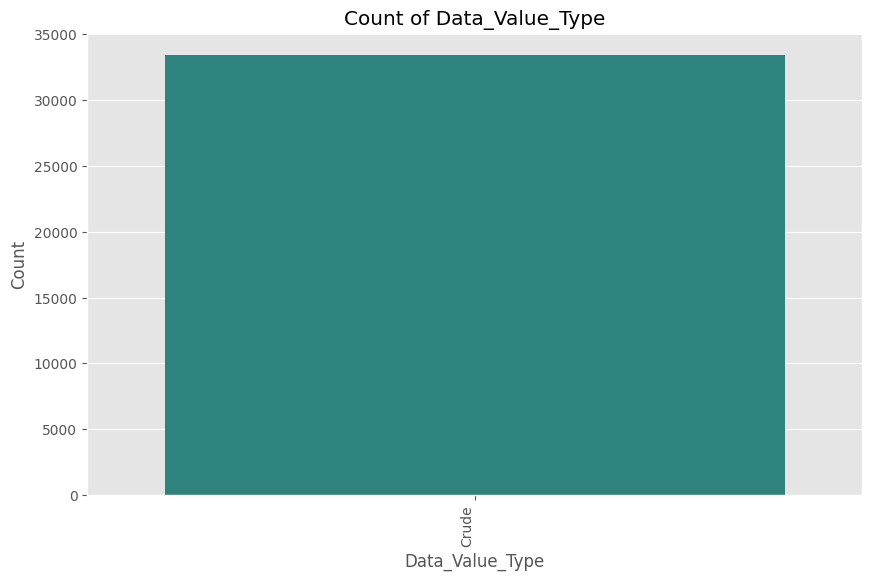


Counts for Data_Value_Type:
Data_Value_Type
Crude    33454
Name: count, dtype: int64

Unique for Data_Value_Type:
1


In [30]:
# Calling the function.

plot_category_counts(df, 'Data_Value_Type')

- The Data_Value_Type represents the type of data value, such as mean, rate, or percentage. In this dataset, the only unique value is crude which implies total number or total count

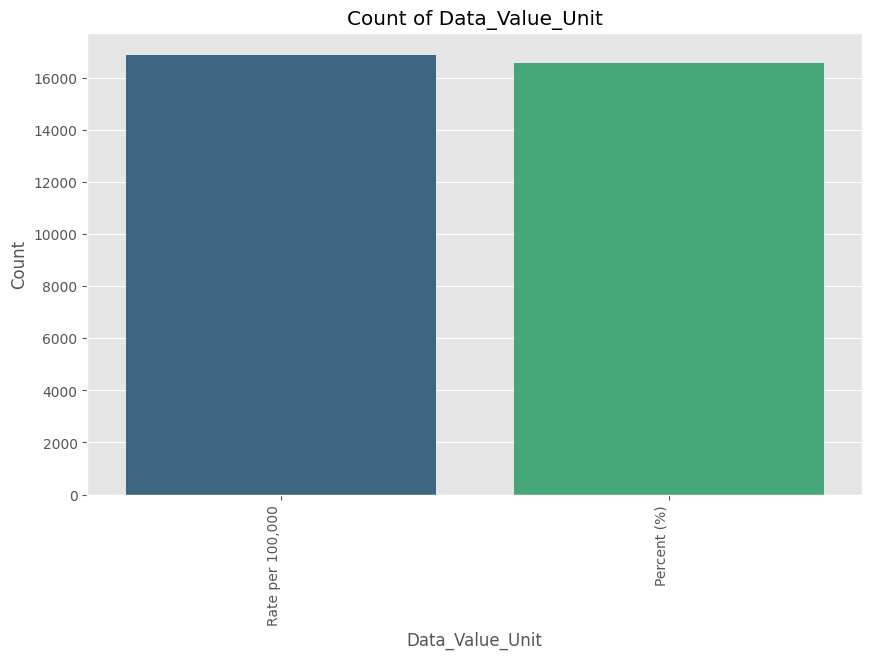


Counts for Data_Value_Unit:
Data_Value_Unit
Rate per 100,000    16884
Percent (%)         16570
Name: count, dtype: int64

Unique for Data_Value_Unit:
2


In [31]:
# Calling the function.

plot_category_counts(df, 'Data_Value_Unit')

- The Data_Value_Unit represents the unit of the data value and has two unique values Rate per 100,000 and Percent (%), with Rate per 100,000 having the highest count.

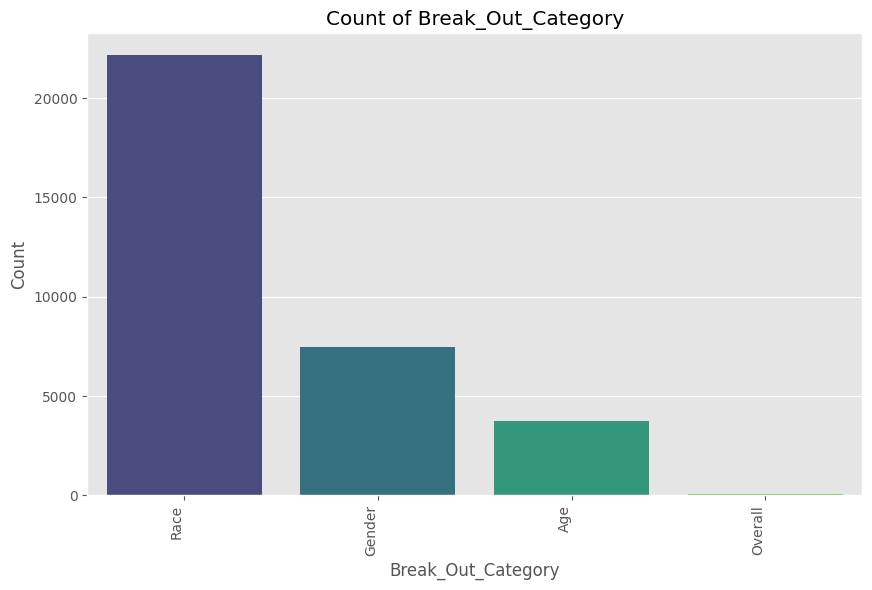


Counts for Break_Out_Category:
Break_Out_Category
Race       22150
Gender      7488
Age         3744
Overall       72
Name: count, dtype: int64

Unique for Break_Out_Category:
4


In [32]:
# Calling the function.

plot_category_counts(df, 'Break_Out_Category')

- The Break_Out_Category represents different types of categories and has 4 unique values, with race having the highest count.

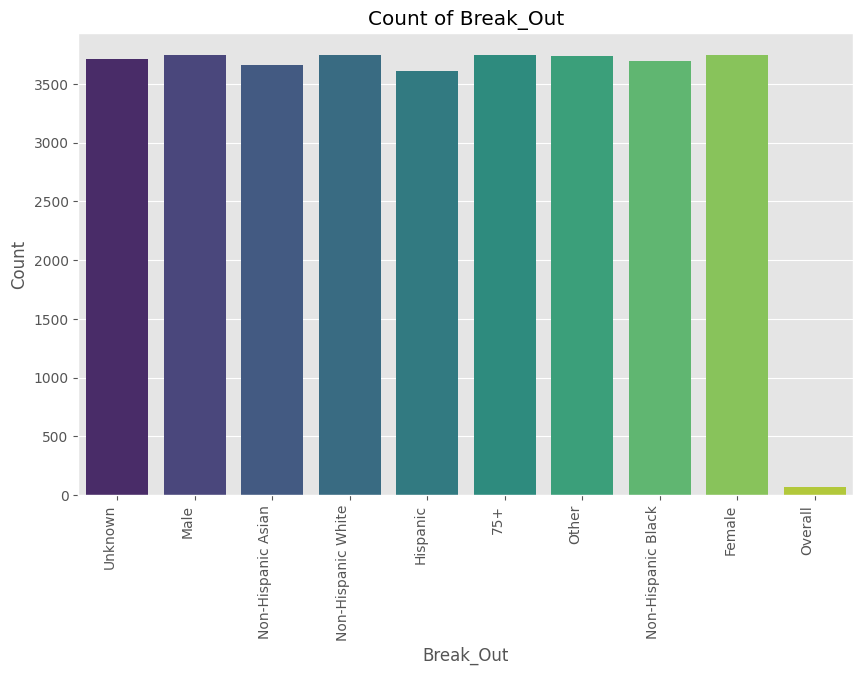


Counts for Break_Out:
Break_Out
Male                  3744
Non-Hispanic White    3744
75+                   3744
Female                3744
Other                 3733
Unknown               3712
Non-Hispanic Black    3697
Non-Hispanic Asian    3658
Hispanic              3606
Overall                 72
Name: count, dtype: int64

Unique for Break_Out:
10


In [33]:
# Calling the function.

plot_category_counts(df, 'Break_Out')

- Similarly, Break_Out represents the subcategory of Break_Out_Category and has 10 unique values, with Male, Non-Hispanic White, 75+, and Female having the highest counts

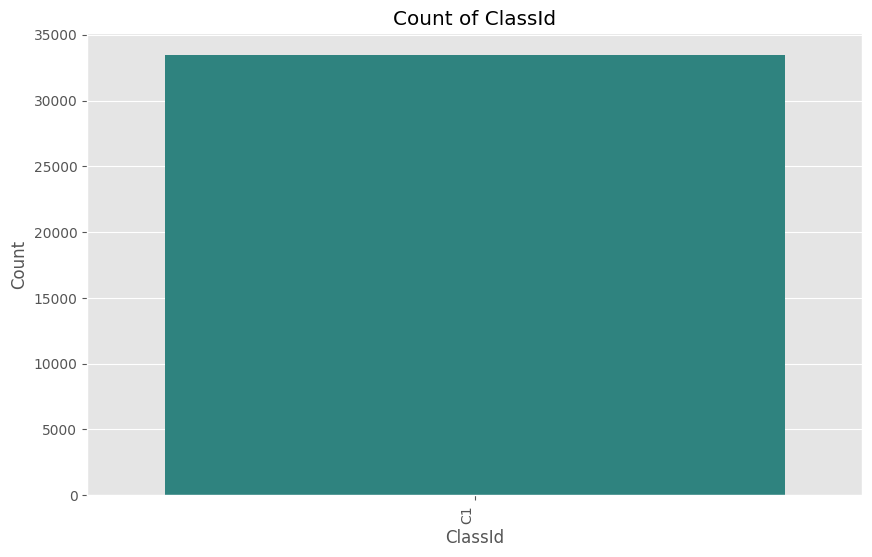


Counts for ClassId:
ClassId
C1    33454
Name: count, dtype: int64

Unique for ClassId:
1


In [34]:
# Calling the function.

plot_category_counts(df, 'ClassId')

- The classid represents the unique identifier for the attribute class, which has only one unique value.

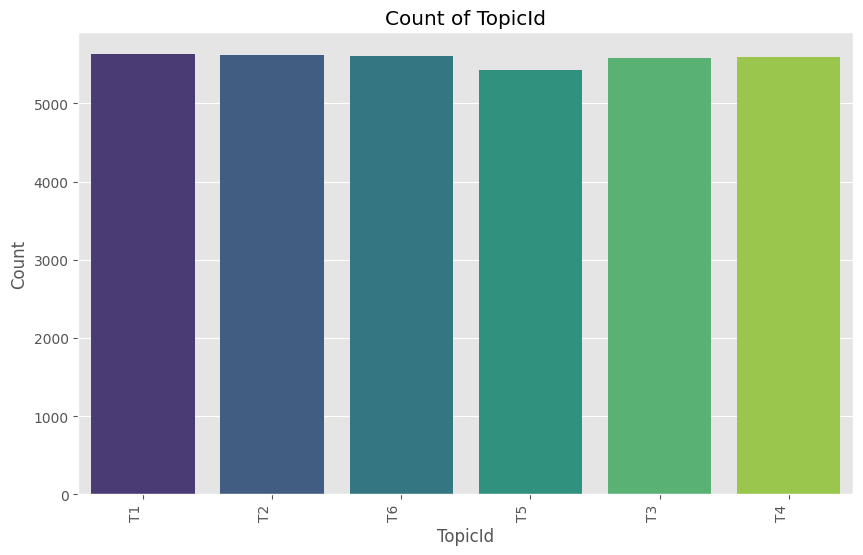


Counts for TopicId:
TopicId
T1    5626
T2    5620
T6    5606
T4    5593
T3    5584
T5    5425
Name: count, dtype: int64

Unique for TopicId:
6


In [35]:
# Calling the function.

plot_category_counts(df, 'TopicId')

-  The  TopicId represents the unique identifier for the attribute topic, which has only 6 unique value.

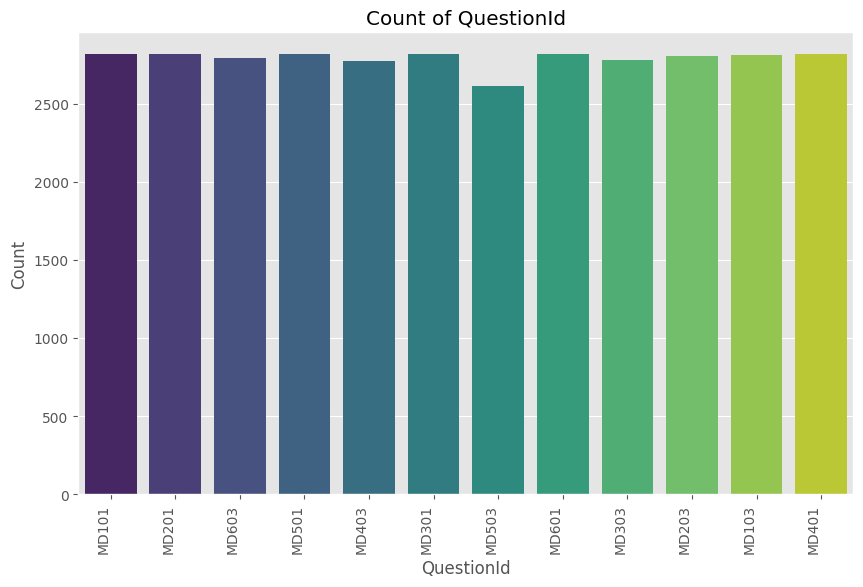


Counts for QuestionId:
QuestionId
MD101    2814
MD201    2814
MD501    2814
MD301    2814
MD601    2814
MD401    2814
MD103    2812
MD203    2806
MD603    2792
MD303    2779
MD403    2770
MD503    2611
Name: count, dtype: int64

Unique for QuestionId:
12


In [36]:
# Calling the function.

plot_category_counts(df, 'QuestionId')

- The  QuestionId represents the unique identifier for the attribute Question, which has only 12 unique value.

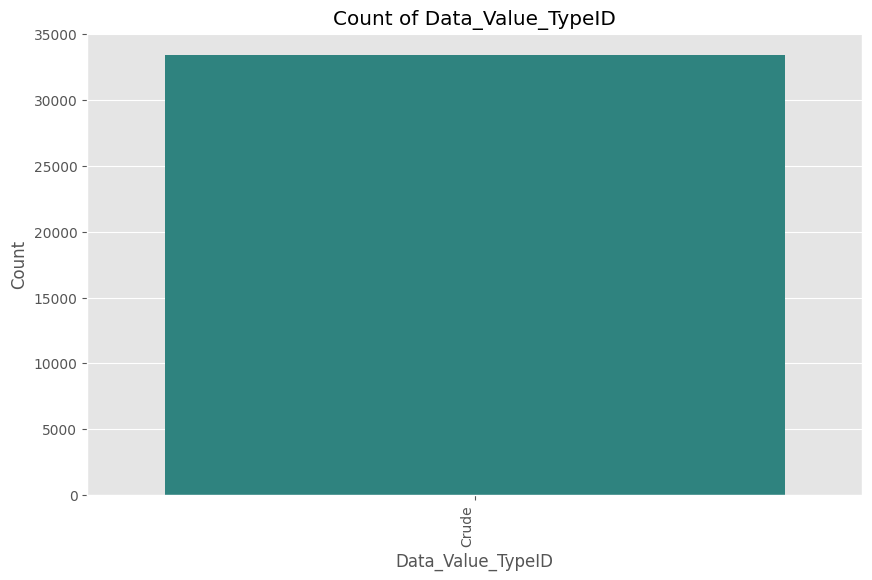


Counts for Data_Value_TypeID:
Data_Value_TypeID
Crude    33454
Name: count, dtype: int64

Unique for Data_Value_TypeID:
1


In [37]:
# Calling the function.

plot_category_counts(df, 'Data_Value_TypeID')

- The  Data_Value_TypeID represents the unique identifier for the attribute Data_Value_Type, which has only one unique value.

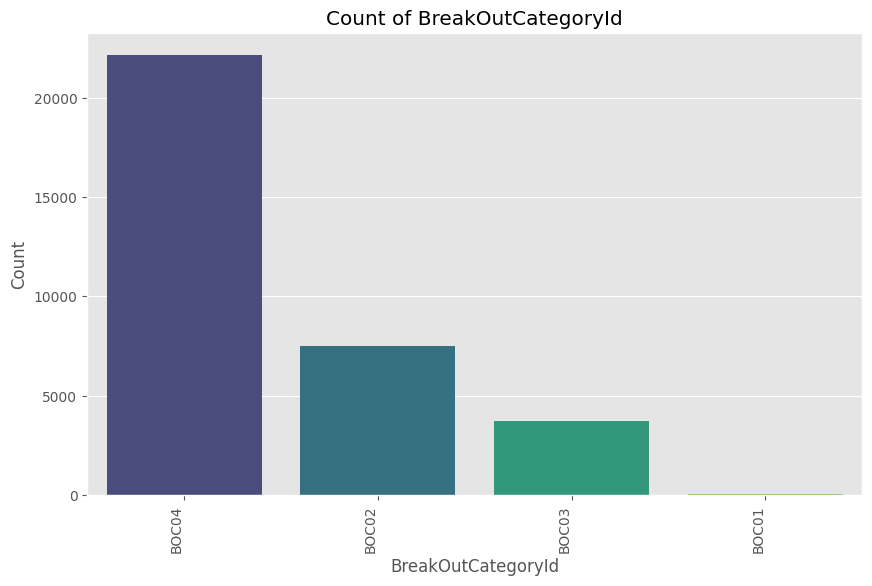


Counts for BreakOutCategoryId:
BreakOutCategoryId
BOC04    22150
BOC02     7488
BOC03     3744
BOC01       72
Name: count, dtype: int64

Unique for BreakOutCategoryId:
4


In [38]:
# Calling the function.

plot_category_counts(df, 'BreakOutCategoryId')

- The BreakOutCategoryId  represents the unique identifier for the attribute BreakOutCategory, which has 4 unique value.

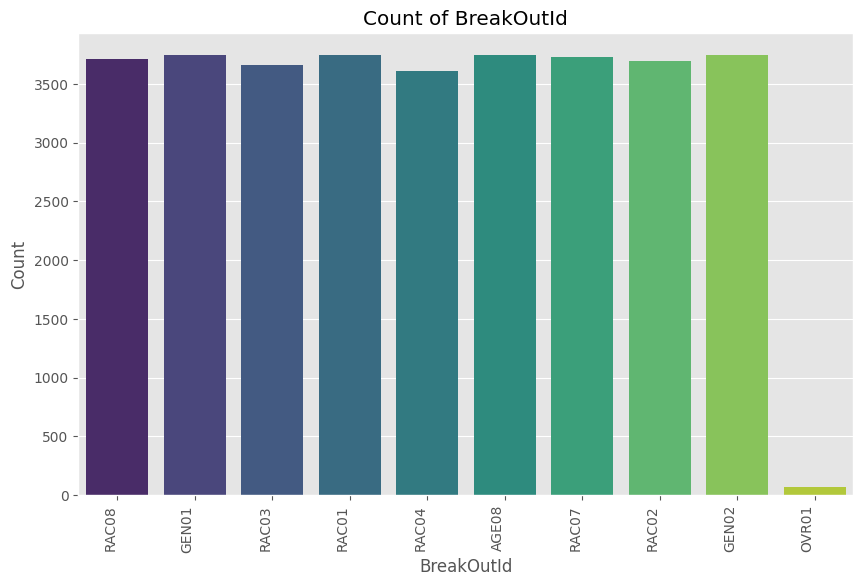


Counts for BreakOutId:
BreakOutId
GEN01    3744
RAC01    3744
AGE08    3744
GEN02    3744
RAC07    3733
RAC08    3712
RAC02    3697
RAC03    3658
RAC04    3606
OVR01      72
Name: count, dtype: int64

Unique for BreakOutId:
10


In [39]:
# Calling the function.

plot_category_counts(df, 'BreakOutId')

- The BreakOutId  represents the unique identifier for the attribute BreakOut, which has 10 unique value.

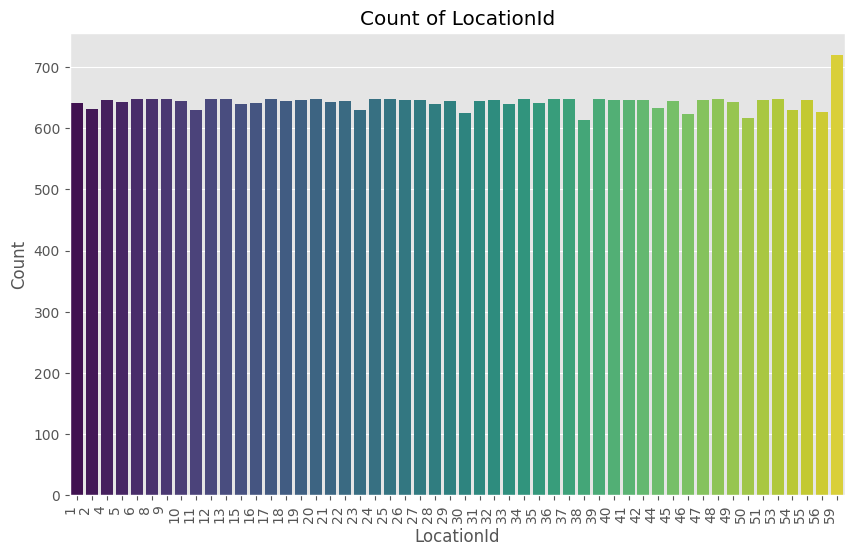


Counts for LocationId:
LocationId
59    720
34    648
37    648
25    648
36    648
24    648
12    648
20    648
39    648
13    648
9     648
17    648
6     648
48    648
8     648
53    648
4     647
27    647
51    647
26    647
40    647
55    647
42    647
32    647
19    647
41    647
47    646
18    645
10    644
31    644
29    644
22    644
45    644
21    643
5     643
49    643
1     642
35    641
16    641
15    640
28    639
33    639
44    634
2     632
11    630
54    630
23    630
56    627
30    625
46    623
50    617
38    614
Name: count, dtype: int64

Unique for LocationId:
52


In [40]:
# Calling the function.

plot_category_counts(df,'LocationId')

- The LocationId  represents the unique identifier for the attribute Location, which has 52 unique value.

In [41]:
# selecting the column pairs to check.

column_pairs = [
    ("Class", "ClassId"),
    ("Topic", "TopicId"),
    ("Break_Out", "BreakOutId"),
    ("Data_Value_Type", "Data_Value_TypeID"),
    ("Question", "QuestionId"),
    ("Break_Out_Category", "BreakOutCategoryId"),
    ("Break_Out", "BreakOutId")
]

# Checking if the mappings are one-to-one.

for desc_col, id_col in column_pairs:
    mapping = df.groupby(desc_col)[id_col].nunique()
    reverse_mapping = df.groupby(id_col)[desc_col].nunique()
    if (mapping.max() == 1) and (reverse_mapping.max() == 1):
        print(f"{desc_col} and {id_col} have a one-to-one mapping.")
    else:
        print(f"{desc_col} and {id_col} do not have a one-to-one mapping.")

Class and ClassId have a one-to-one mapping.
Topic and TopicId have a one-to-one mapping.
Break_Out and BreakOutId have a one-to-one mapping.
Data_Value_Type and Data_Value_TypeID have a one-to-one mapping.
Question and QuestionId have a one-to-one mapping.
Break_Out_Category and BreakOutCategoryId have a one-to-one mapping.
Break_Out and BreakOutId have a one-to-one mapping.


- In this, we are checking one-to-one mapping to see whether the columns ending with the suffix ID represent the unique identifier for their corresponding columns.

----

<b> [Back to Content](#Content) </b>

### 4.2 Bivariate Analysis

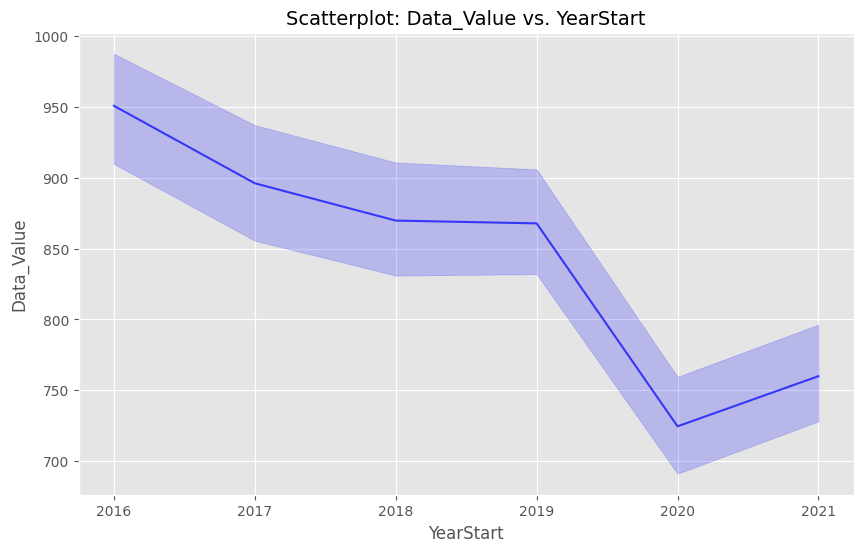

In [42]:
# Scatterplot for  Data_Value vs. YearStart.

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearStart', y='Data_Value', alpha=0.7, color='blue')
plt.title('Scatterplot: Data_Value vs. YearStart', fontsize=14)
plt.xlabel('YearStart', fontsize=12)
plt.ylabel('Data_Value', fontsize=12)
plt.show()

- Hospitalization rate for cardiovascular disease is decreasing till the year 2020 and after that it increased.

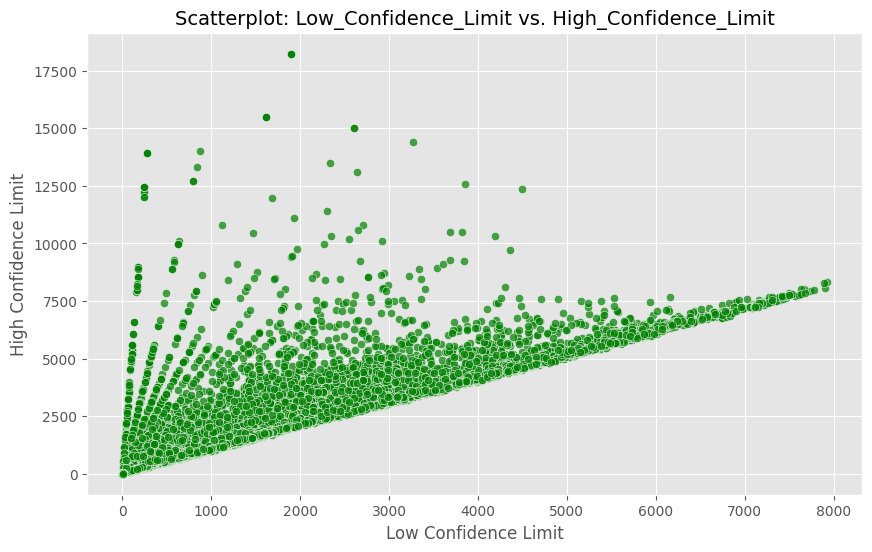

In [43]:
# Scatterplot for Low_Confidence_Limit vs High_Confidence_Limit.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Low_Confidence_Limit', y='High_Confidence_Limit', alpha=0.7, color='green')
plt.title('Scatterplot: Low_Confidence_Limit vs. High_Confidence_Limit', fontsize=14)
plt.xlabel('Low Confidence Limit', fontsize=12)
plt.ylabel('High Confidence Limit', fontsize=12)
plt.show()

- The graphs  has strong Positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

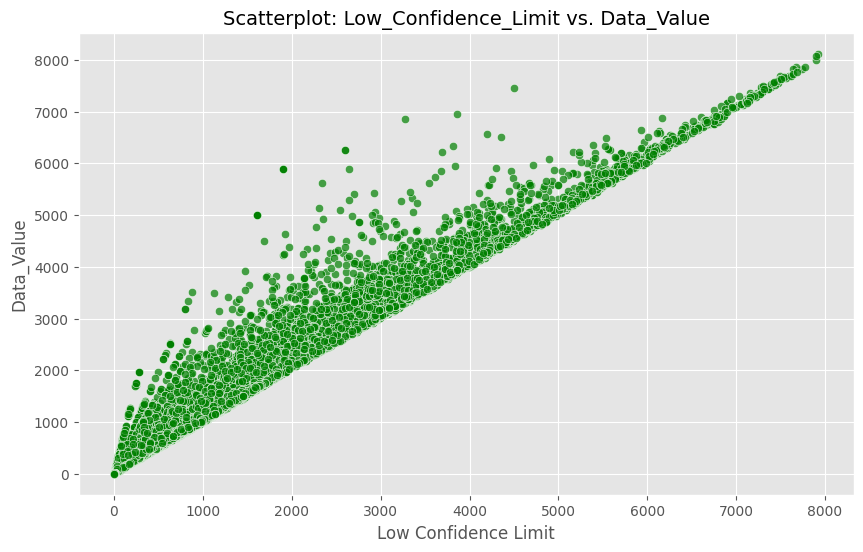

In [44]:
# Scatterplot for Low_Confidence_Limit vs Data_Value.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Low_Confidence_Limit', y='Data_Value', alpha=0.7, color='green')
plt.title('Scatterplot: Low_Confidence_Limit vs. Data_Value', fontsize=14)
plt.xlabel('Low Confidence Limit', fontsize=12)
plt.ylabel('Data_Value', fontsize=12)
plt.show()

- The graphs  has strong negative correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

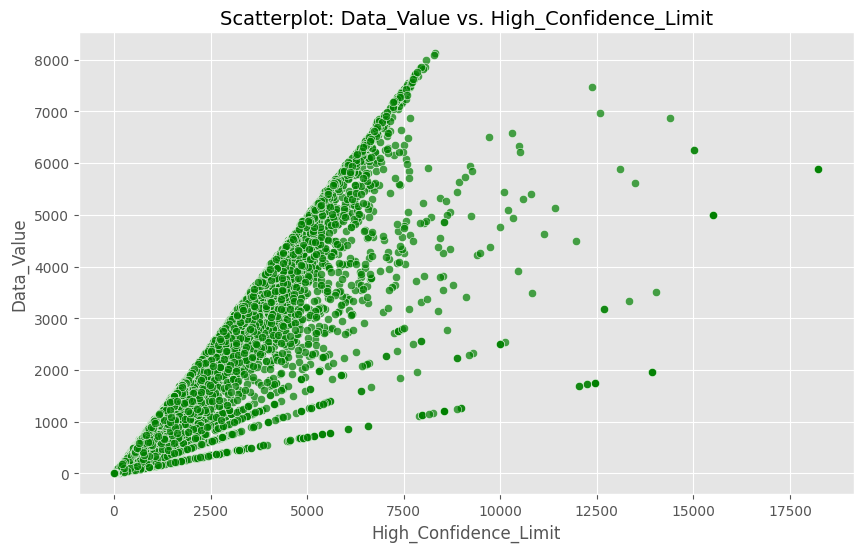

In [45]:
# Scatterplot for Low_Confidence_Limit vs. High_Confidence_Limit.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='High_Confidence_Limit', y='Data_Value', alpha=0.7, color='green')
plt.title('Scatterplot: Data_Value vs. High_Confidence_Limit', fontsize=14)
plt.xlabel('High_Confidence_Limit', fontsize=12)
plt.ylabel('Data_Value', fontsize=12)
plt.show()

- The graphs  has strong Positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

In [46]:
def plot_numerical_vs_categorical(df, cat_col, num_col, plot_type="bar"):

    """
    Plots a numerical vs categorical relationship using either bar or box plot.
    - cat_col: Categorical column
    - num_col: Numerical column
    - plot_type: "bar" for bar plot, "box" for box plot
    """

    plt.figure(figsize=(10, 6))
    if plot_type == "bar":
        sns.barplot(x=cat_col, y=num_col, data=df, ci=None)
        plt.title(f"Bar Plot of {num_col} across {cat_col}")

    plt.xticks(rotation=75)
    plt.show()

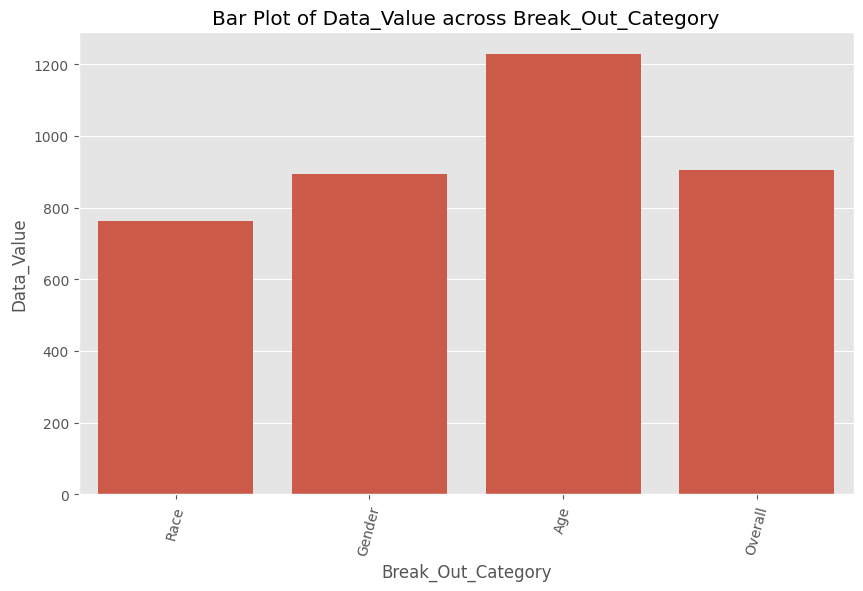

In [47]:
# Calling the function.

plot_numerical_vs_categorical(df, 'Break_Out_Category', 'Data_Value', plot_type="bar")

- Hospitalization rate for cardiovascular disease for Break out Category is age is highest

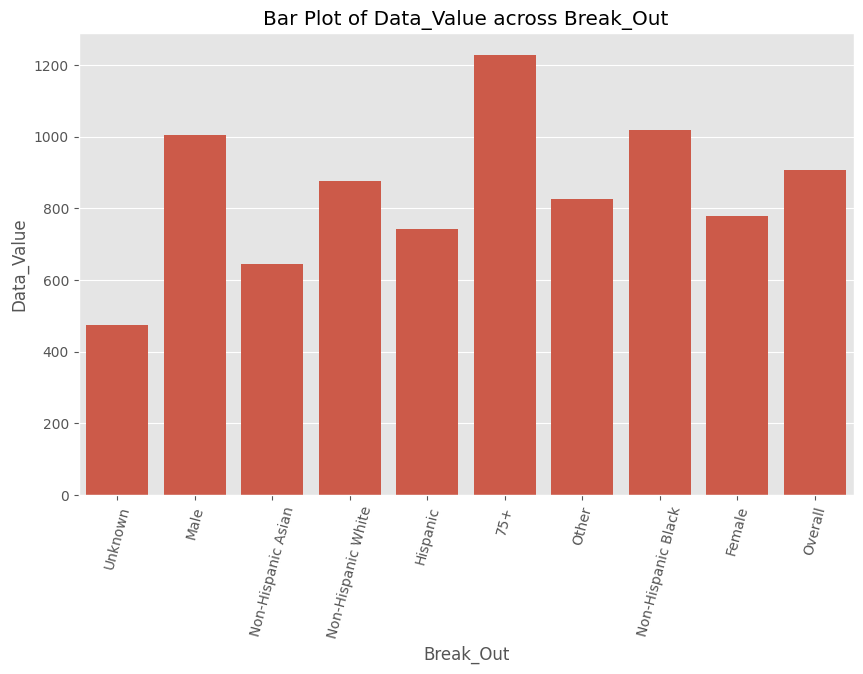

In [48]:
# Calling the function.

plot_numerical_vs_categorical(df, 'Break_Out', 'Data_Value', plot_type="bar")

- Hospitalization rate for cardiovascular disease for age above 75+ is highest

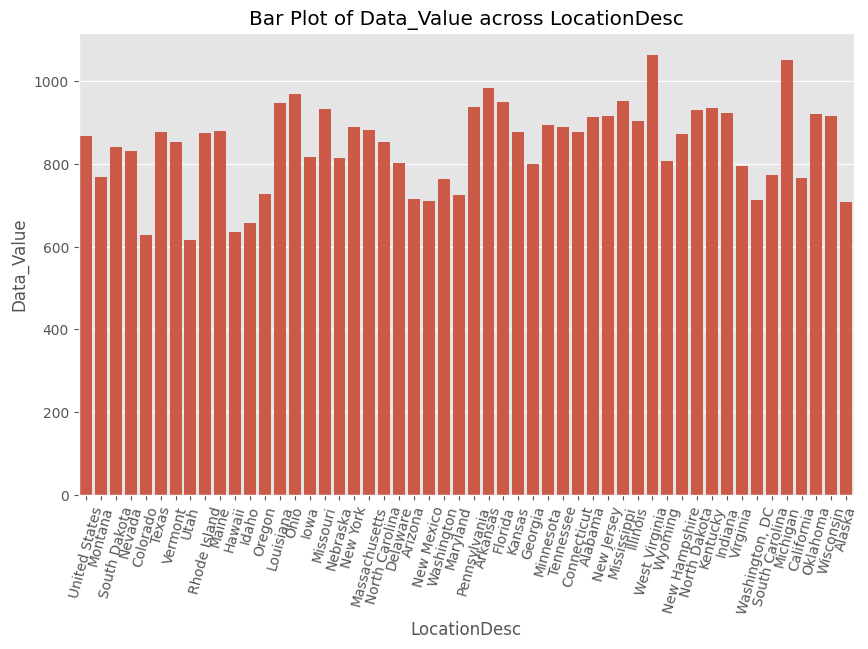

In [49]:
# Calling the function.

plot_numerical_vs_categorical(df, 'LocationDesc', 'Data_Value', plot_type="bar")

- Hospitalization rate for cardiovascular disease in West Virginia is highest

----

<b> [Back to Content](#Content) </b>

### 4.3 Multivariate Analysis

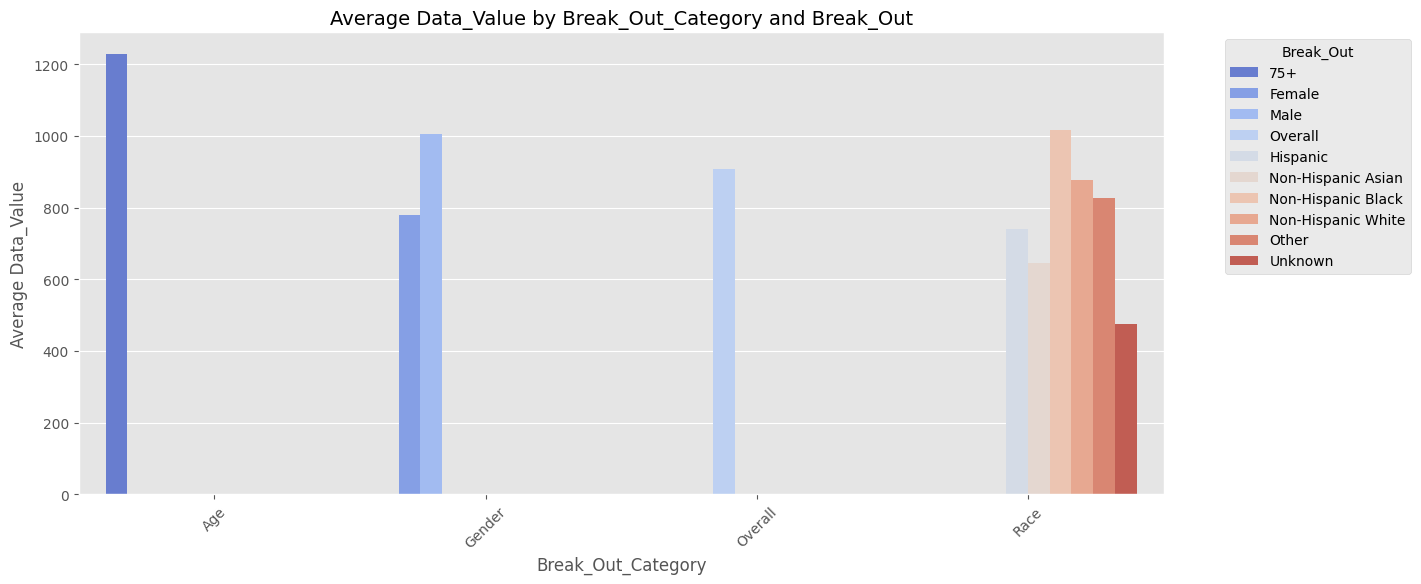

In [50]:
# Bar plot grouped by Average Data_Value  vs. Break_Out_Category with Break_Out.

plt.figure(figsize=(14, 6))
grouped_1 = df.groupby(['Break_Out_Category', 'Break_Out'])['Data_Value'].mean().reset_index()
sns.barplot(data=grouped_1, x='Break_Out_Category', y='Data_Value', hue='Break_Out', palette="coolwarm")
plt.title('Average Data_Value by Break_Out_Category and Break_Out', fontsize=14)
plt.xlabel('Break_Out_Category', fontsize=12)
plt.ylabel('Average Data_Value', fontsize=12)
plt.legend(title='Break_Out', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Display plot
plt.show()

- Average Hospitalization rate for cardiovascular diasease in age category is highest if the age is more than 75
- Average Hospitalization rate for cardiovascular diasease in gender category is highest for male
- Average Hospitalization rate for cardiovascular diasease in race category is highest for Non-Hispanic Asian

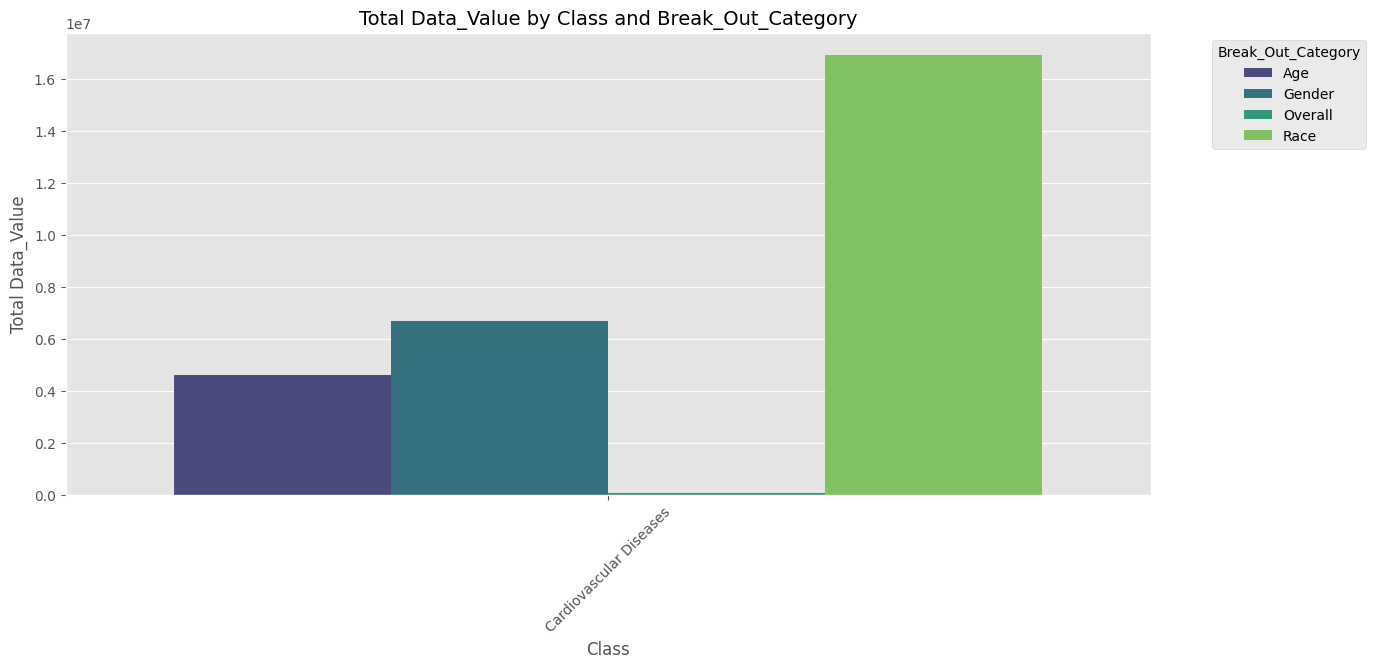

In [51]:
# Bar plot grouped by Class vs. Break_Out_Category with total Data_Value.

plt.figure(figsize=(14, 6))
grouped_2 = df.groupby(['Class', 'Break_Out_Category'])['Data_Value'].sum().reset_index()
sns.barplot(data=grouped_2, x='Class', y='Data_Value', hue='Break_Out_Category', palette="viridis")
plt.title('Total Data_Value by Class and Break_Out_Category', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Total Data_Value', fontsize=12)
plt.legend(title='Break_Out_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Display plot

plt.show()

- Average Hospitalization rate for cardiovascular diasease is highest for race within the class.

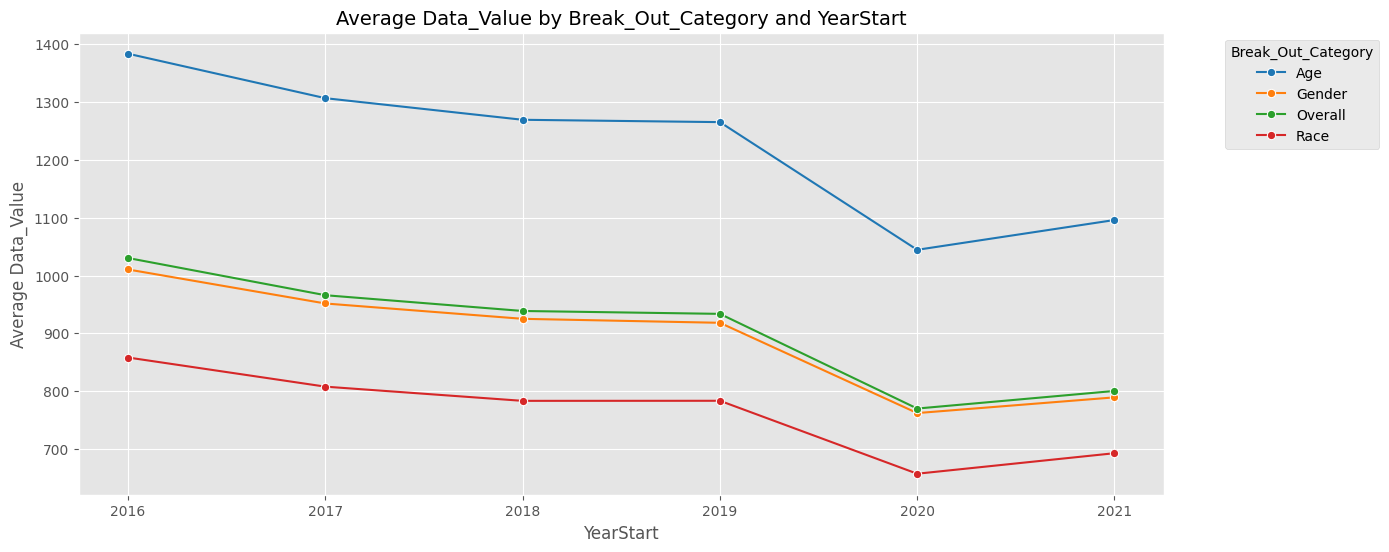

In [52]:
# line plot grouped by Break_Out_Category vs. YearStart with average Data_Value.

plt.figure(figsize=(14, 6))
grouped_3 = df.groupby(['Break_Out_Category', 'YearStart'])['Data_Value'].mean().reset_index()
sns.lineplot(data=grouped_3, x='YearStart', y='Data_Value', hue='Break_Out_Category', marker='o', palette="tab10")
plt.title('Average Data_Value by Break_Out_Category and YearStart', fontsize=14)
plt.xlabel('YearStart', fontsize=12)
plt.ylabel('Average Data_Value', fontsize=12)
plt.legend(title='Break_Out_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Average Hospitalization rate for cardiovascular diasease for all break out category is decrased till 2020 and after that it starts to increase.

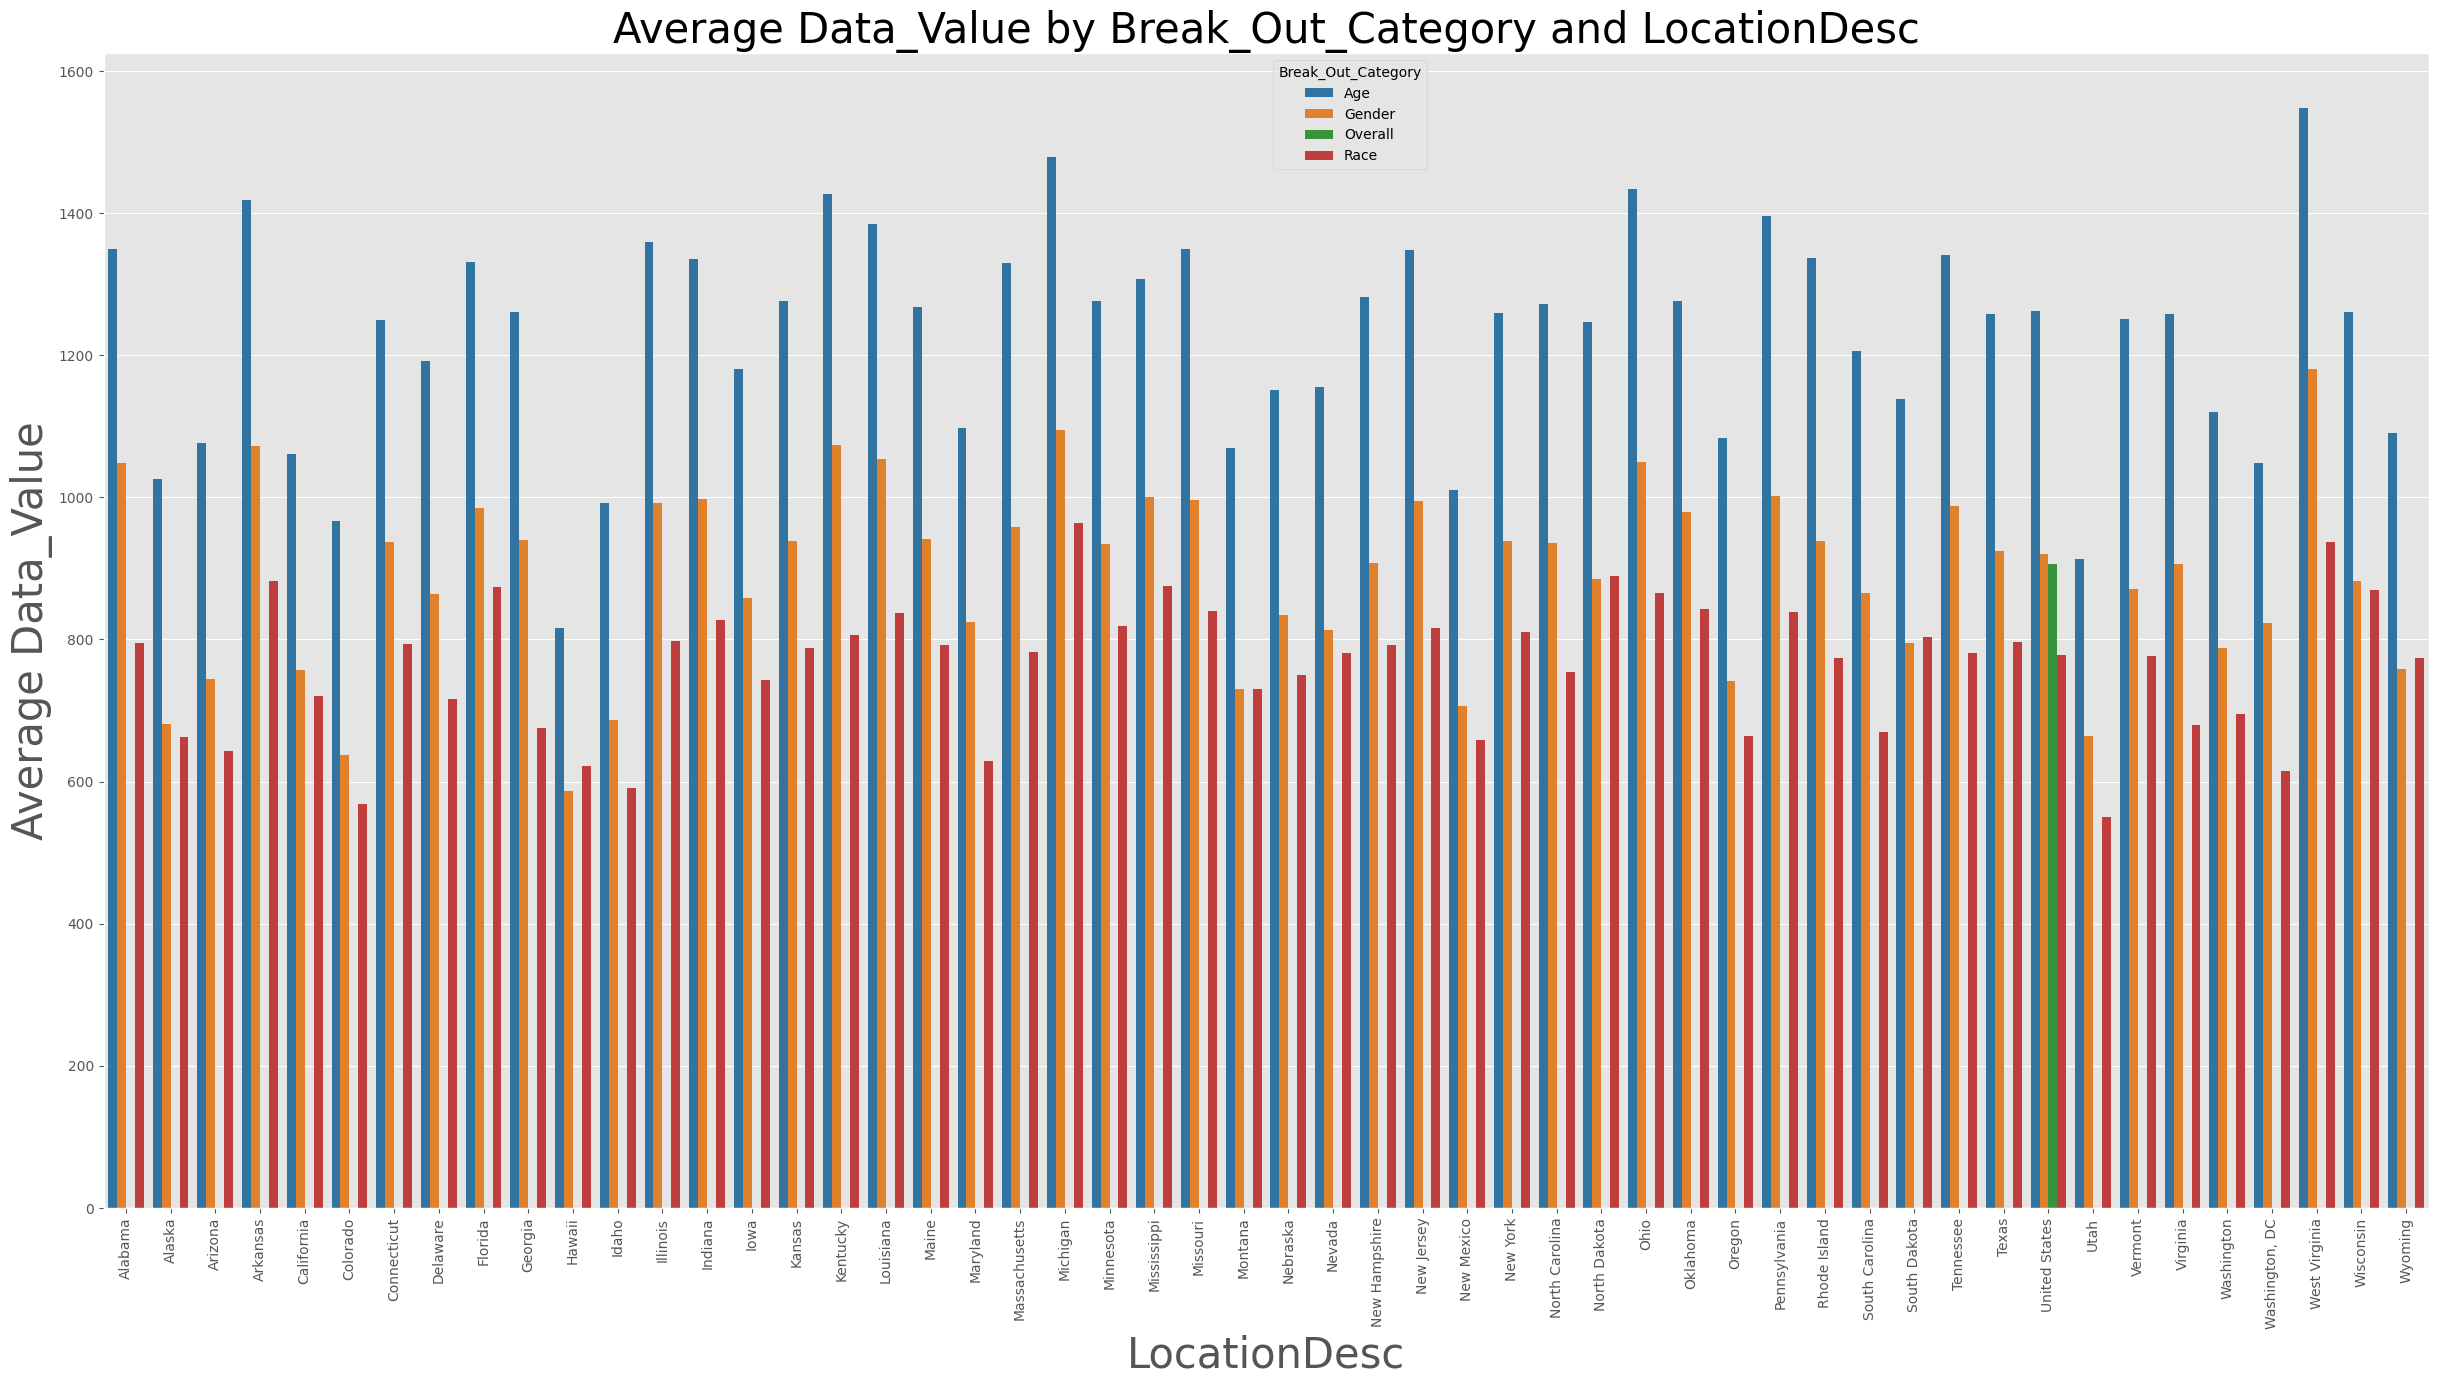

In [53]:
# Bar plot grouped by Break_Out_Category vs. LocationDesc with average Data_Value.

plt.figure(figsize=(30, 15))
grouped_3 = df.groupby(['Break_Out_Category', 'LocationDesc'])['Data_Value'].mean().reset_index()
sns.barplot(data=grouped_3, x='LocationDesc', y='Data_Value', hue='Break_Out_Category', palette="tab10")
plt.title('Average Data_Value by Break_Out_Category and LocationDesc', fontsize=30)
plt.xlabel('LocationDesc', fontsize=30)
plt.ylabel('Average Data_Value', fontsize=30)
plt.legend(title='Break_Out_Category', bbox_to_anchor=(.5, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

- Average Hospitalization rate for cardiovascular diasease for the age category is highest in the West Virginia.

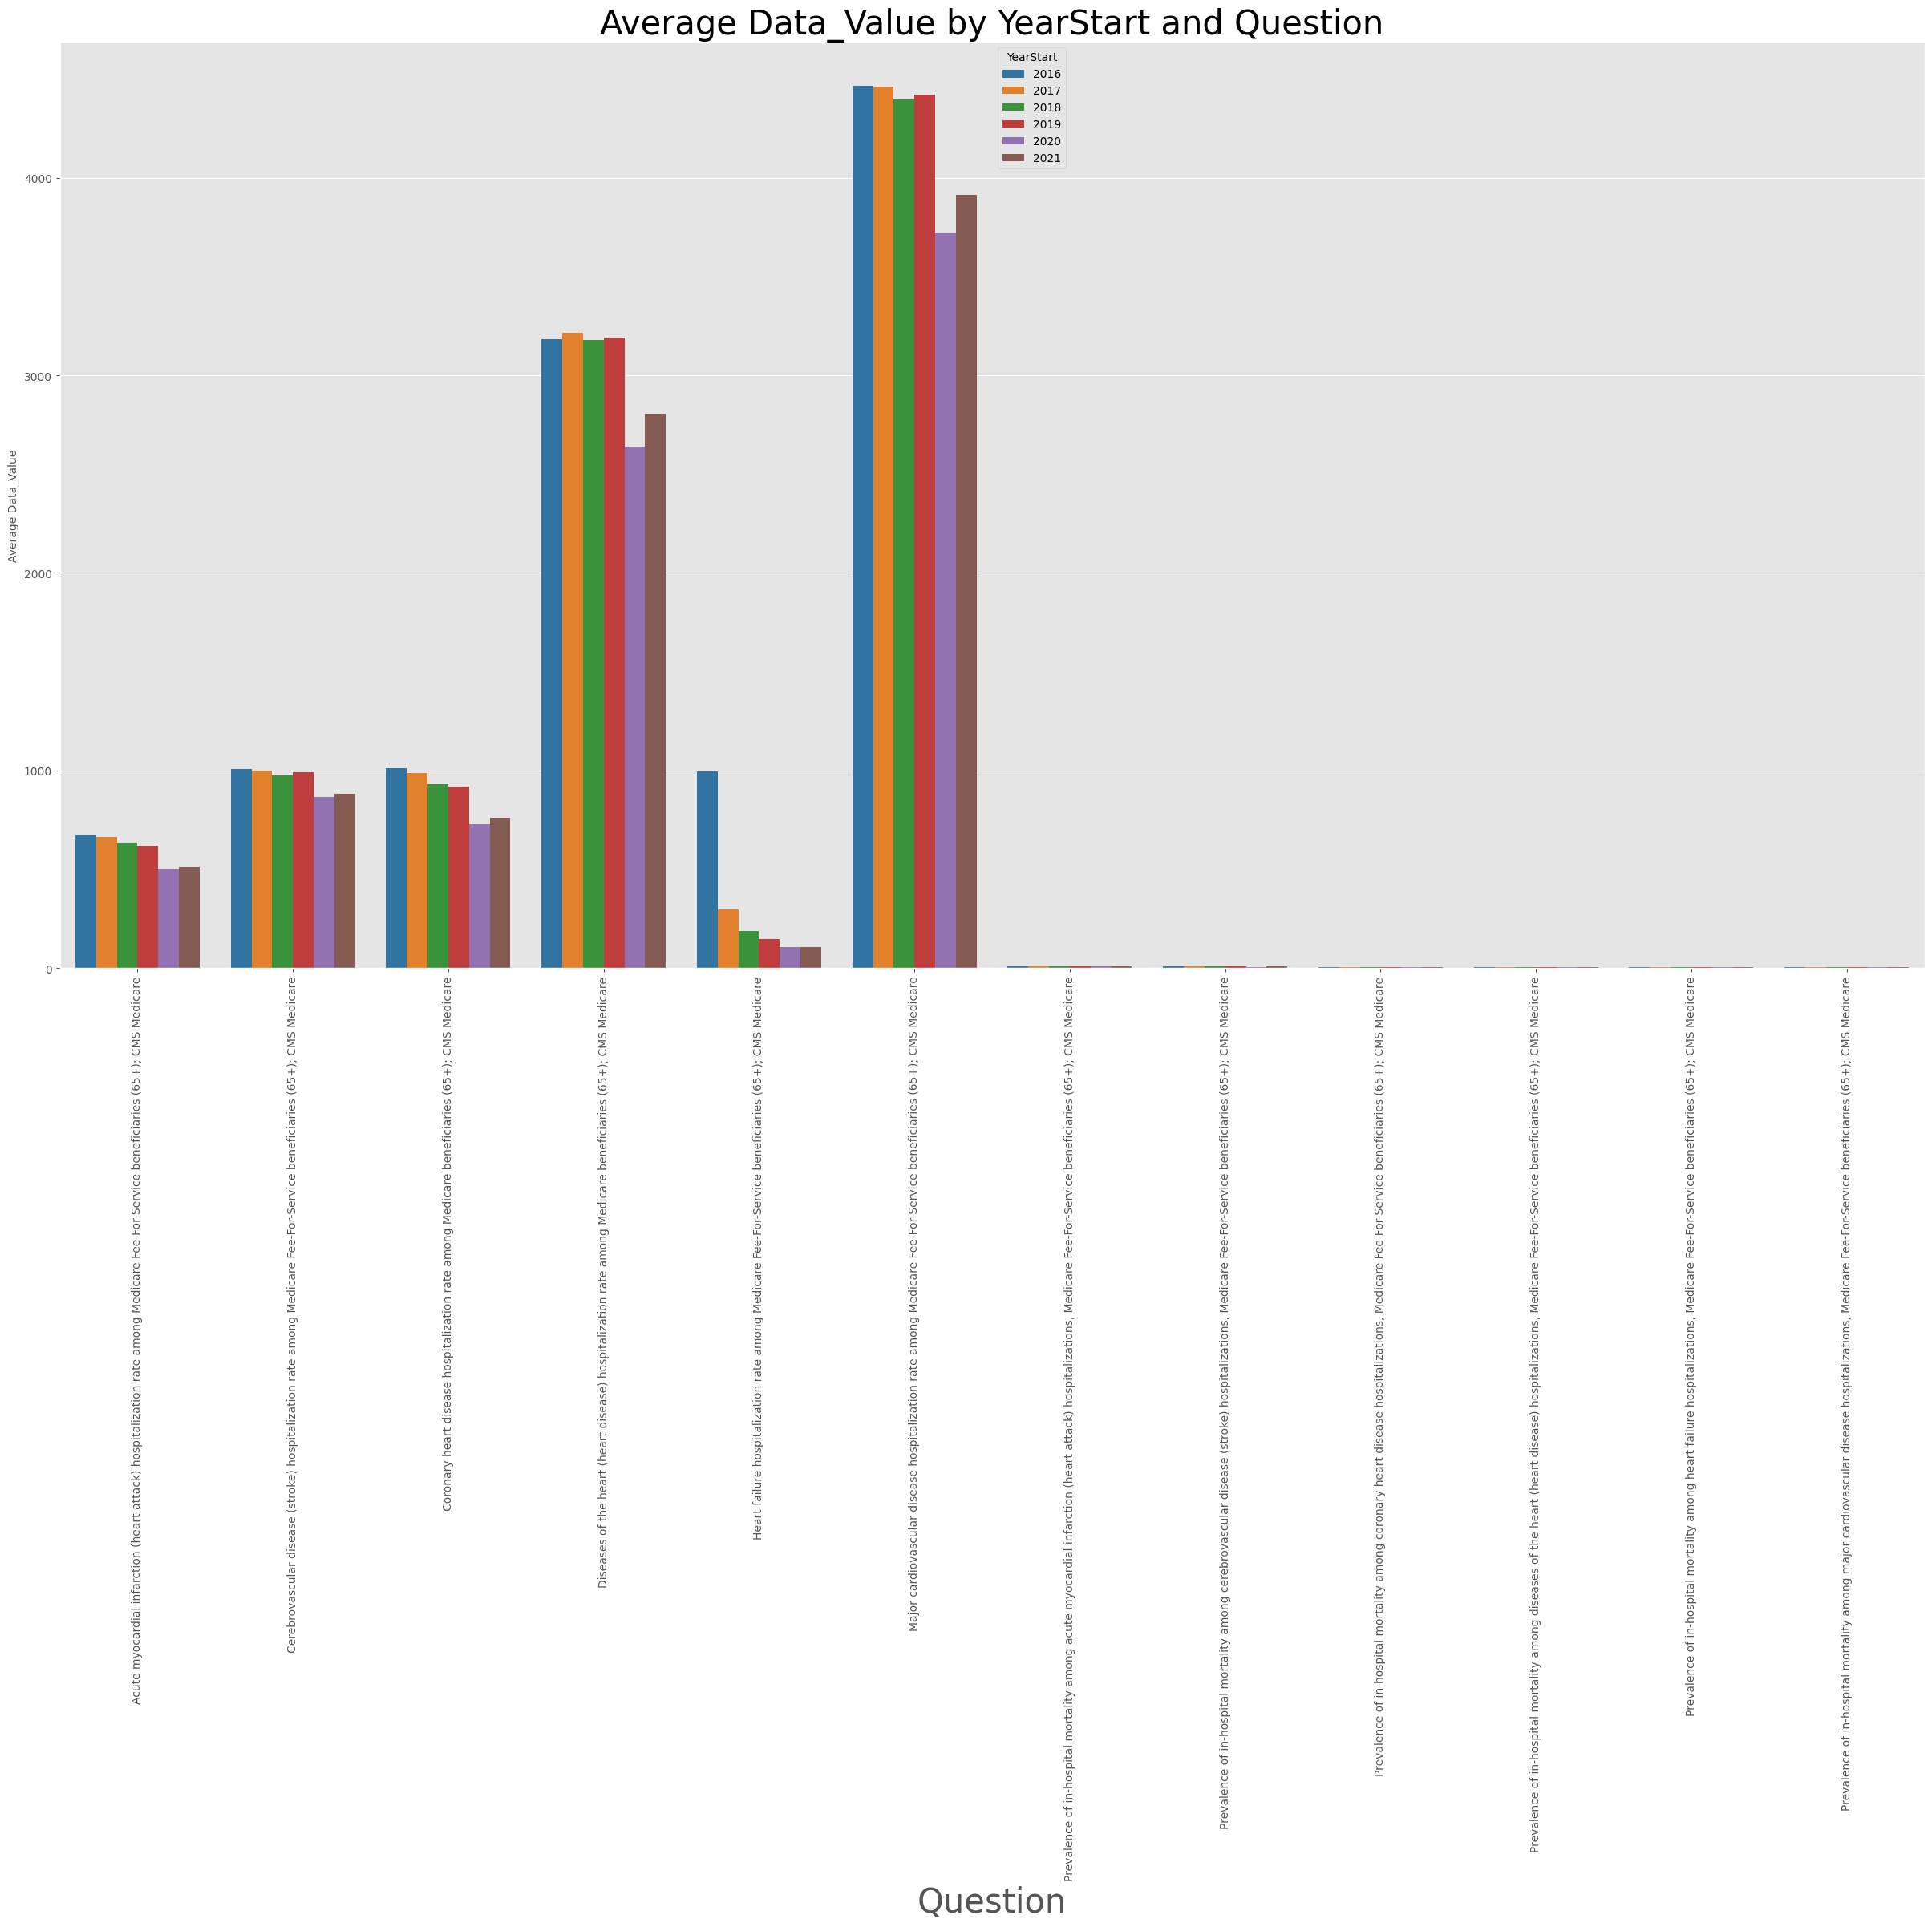

In [54]:
# Bar plot grouped by Question vs. YearStart with average Data_Value.

plt.figure(figsize=(30, 15))
grouped_3 = df.groupby(['YearStart', 'Question'])['Data_Value'].mean().reset_index()
sns.barplot(data=grouped_3, x='Question', y='Data_Value', hue='YearStart', palette="tab10")
plt.title('Average Data_Value by YearStart and Question', fontsize=30)
plt.xlabel('Question', fontsize=30)
plt.ylabel('Average Data_Value', fontsize=10)
plt.legend(title='YearStart', bbox_to_anchor=(.5, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

- Average Hospitalization rate for major cardiovascular diasease  fee for medicare service for beneficiaries is almost same in the year 2016 and 2017 for age more than 65.

----

<b> [Back to Content](#Content) </b>

## 5. Data Cleaning

In [55]:
# Check for missing values in each columns.

df.isnull().sum()

,0
YearStart,0
LocationAbbr,0
LocationDesc,0
DataSource,0
Class,0
Topic,0
Question,0
Data_Value_Type,0
Data_Value_Unit,0
Data_Value,0


In [56]:
# Check for missing values in each columns.

df.isnull().sum()

,0
YearStart,0
LocationAbbr,0
LocationDesc,0
DataSource,0
Class,0
Topic,0
Question,0
Data_Value_Type,0
Data_Value_Unit,0
Data_Value,0


- Since we split the geolocation, we are removing it as well.

In [57]:
# Selecting the columns to drop based on their lack of relevance for visualization.

columns_to_drop = ['Data_Value_Alt','ClassId', 'TopicId', 'QuestionId', 'Data_Value_TypeID',
    'BreakOutCategoryId', 'BreakOutId', 'LocationId','DataSource','Data_Value_Unit']

# Dropping the specified columns

df = df.drop(columns=columns_to_drop, errors='ignore')

# checking the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33454 entries, 0 to 33453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              33454 non-null  object 
 1   LocationAbbr           33454 non-null  object 
 2   LocationDesc           33454 non-null  object 
 3   Class                  33454 non-null  object 
 4   Topic                  33454 non-null  object 
 5   Question               33454 non-null  object 
 6   Data_Value_Type        33454 non-null  object 
 7   Data_Value             33454 non-null  float64
 8   Low_Confidence_Limit   33454 non-null  float64
 9   High_Confidence_Limit  33454 non-null  float64
 10  Break_Out_Category     33454 non-null  object 
 11  Break_Out              33454 non-null  object 
 12  GeoLocation            32734 non-null  object 
 13  Latitude               32734 non-null  float64
 14  Longitude              32734 non-null  float64
dtypes:

In [58]:
# Dropping the geolocation feature.

df = df.drop(columns='GeoLocation', axis=1)

- Now imputing Latitude and Longitude since they have 720 null values.

In [59]:
# Selecting the columns to impute.

columns_to_impute = ['Latitude', 'Longitude']

# Applying the KNNImputer only on the specified columns.

imputer = KNNImputer(n_neighbors=5)
df[columns_to_impute] = pd.DataFrame(imputer.fit_transform(df[columns_to_impute]), columns=columns_to_impute)

In [60]:
# Sanity check.

df.isnull().sum()

,0
YearStart,0
LocationAbbr,0
LocationDesc,0
Class,0
Topic,0
Question,0
Data_Value_Type,0
Data_Value,0
Low_Confidence_Limit,0
High_Confidence_Limit,0


- **Now our data set is clean**

#### Prepare Target Variable

In [61]:
# df['Data_Value'] is the target variable and it contains large integers.

# Apply log transformation (log base 10 for example).

df['Log_Data_Value'] = np.log10(df['Data_Value'] + 1)  # Adding 1 to avoid log(0) if any values are zero

# Defining custom bins based on transformed values.

# For example, bins can be defined to capture different orders of magnitude.

df['Data_Value_Level'] = pd.cut(df['Log_Data_Value'], bins=[-np.inf, 1, 2, 3, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Display results

print(df)

      YearStart LocationAbbr   LocationDesc                    Class  \
0          2016           US  United States  Cardiovascular Diseases   
1          2017           US  United States  Cardiovascular Diseases   
2          2018           US  United States  Cardiovascular Diseases   
3          2019           US  United States  Cardiovascular Diseases   
4          2020           US  United States  Cardiovascular Diseases   
...         ...          ...            ...                      ...   
33449      2016           IA           Iowa  Cardiovascular Diseases   
33450      2018           OR         Oregon  Cardiovascular Diseases   
33451      2018           NV         Nevada  Cardiovascular Diseases   
33452      2020           ME       Maryland  Cardiovascular Diseases   
33453      2021           NM     New Mexico  Cardiovascular Diseases   

                              Topic  \
0      Major Cardiovascular Disease   
1      Major Cardiovascular Disease   
2      Major Cardi

In [62]:
# Sanity check.

df['Data_Value_Level'].unique()

['Very High', 'Low', 'High', 'Medium']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [63]:
# Removing  the "Data_Value"  attributes

df.drop(['Data_Value'], axis=1, inplace=True)

In [64]:
#changing the data type of target  variable

df['Data_Value_Level'] = df['Data_Value_Level'].astype(object)

#### Data Imbalance check

In [65]:
# Check class distribution

class_counts = df['Data_Value_Level'].value_counts()
print("Class distribution:\n", class_counts)

# Calculate class distribution percentages

class_percentage = df['Data_Value_Level'].value_counts(normalize=True) * 100
print("\nClass distribution percentages:\n", class_percentage)


Class distribution:
 Data_Value_Level
Low          15088
Very High     8116
High          7816
Medium        2434
Name: count, dtype: int64

Class distribution percentages:
 Data_Value_Level
Low          45.100735
Very High    24.260178
High         23.363424
Medium        7.275662
Name: proportion, dtype: float64


- Due to the  imbalanced distribution in the target variable Data_Value_Level, accuracy is not a reliable metric for model evaluation. Instead, alternative metrics such as precision, recall, and F1-score should be prioritized.

----

<b> [Back to Content](#Content) </b>

### 5.1 Handling Skewness

- We observed that the majority of the numerical columns have skewness. To address this issue, we are implementing the Box-Cox method. Before proceeding checking if there are any zero values or negative values in each feature since Box-Cox works better with positive values.

In [66]:
# Selecting numeric columns and  excluding 'Latitude' and 'Longitude'
#(those values need to stay same value since they represent the coordinates of the  location).

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.difference(['Latitude', 'Longitude'])

# Checking for negative values.

negative_check = df[numeric_cols].apply(lambda x: (x < 0).any())

print(negative_check)

High_Confidence_Limit     True
Log_Data_Value           False
Low_Confidence_Limit      True
dtype: bool


- This shows column such as Low_Confidence_Limit and High_Confidence_Limit has negative value

In [67]:
# Selecting numeric columns and  excluding 'Latitude' and 'Longitude'
# (those values need to stay same value since they represent the coordinates of the  location).

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.difference(['Latitude', 'Longitude'])

# Checking for  zero values.

negative_zero_check = df[numeric_cols].apply(lambda x: ((x < 0) | (x == 0)).any())

print(negative_zero_check)

High_Confidence_Limit    True
Log_Data_Value           True
Low_Confidence_Limit     True
dtype: bool


All the features contain negative values

In [68]:
# Lambda value for high and low confidence limit.

columns = ['High_Confidence_Limit','Low_Confidence_Limit']


for col in columns:
    #  Calculating  the minimum value of the column
    min_val = df[col].min()

    #  Determining the shift anount
    shift = abs(min_val) + 1 if min_val <= 0 else 0

    # applying  the shift
    df[col] += shift

    # Perform Box-Cox transformation and save the lambda value
    fitted_data, fitted_lambda = stats.boxcox(df[col])

    #  Replace the original column with transformed data
    df[col] = fitted_data

    #  Print the lambda value for each column
    print(f"Lambda value for {col}: {fitted_lambda}")


Lambda value for High_Confidence_Limit: 0.010389102665718688
Lambda value for Low_Confidence_Limit: -0.06058797472153121


----

<b> [Back to Content](#Content) </b>

### 5.2 Handling Outliers

In [69]:
numeric_colms =  ['High_Confidence_Limit','Low_Confidence_Limit']

# Looping through numeric columns to get the lower and upper bound values.

for col in numeric_colms:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    range = [lower_bound, upper_bound]
    print(f"range in {col}:",range)

    # checking the maximum value

    max_value = df[col].max()
    print(f"The maximum value in {col} is: {max_value}")

range in High_Confidence_Limit: [-5.443071116085707, 15.058408360545332]
The maximum value in High_Confidence_Limit is: 10.328883876398343
range in Low_Confidence_Limit: [-4.230004167068135, 11.369108728846243]
The maximum value in Low_Confidence_Limit is: 6.924786578347457


- The outliers are valid data points.For example, in the feature High_Confidence_Limit as expected for an upper confidence limit, it has the greatest maximum value and the broadest range.

- Coming to the Low_Confidence_Limit,represents the lower bound of the estimations, with the smallest maximum value and the narrowest range which also shows a valid data point.


----

<b> [Back to Content](#Content) </b>

## 6. Prepped Data Review

In [70]:
# Checking every columns has the correct data types.

df.dtypes

,0
YearStart,object
LocationAbbr,object
LocationDesc,object
Class,object
Topic,object
Question,object
Data_Value_Type,object
Low_Confidence_Limit,float64
High_Confidence_Limit,float64
Break_Out_Category,object


In [71]:
# Ensure that there are no duplicates.

df.duplicated().sum()

0

In [72]:
# Checking the descriptive statistics.

df.describe()

,Low_Confidence_Limit,High_Confidence_Limit,Latitude,Longitude,Log_Data_Value
count,33454.000000,33454.000000,33454.000000,33454.000000,33454.000000
mean,3.390925,4.798606,-93.372358,39.664278,1.839829
std,2.181120,2.870885,18.608645,6.144294,1.231159
min,0.000000,0.000000,-157.857749,21.304850,0.000000
25%,1.619663,2.244984,-100.373531,35.472031,0.785330
50%,2.174872,4.657787,-89.816371,39.493240,1.414973
75%,5.519441,7.370354,-79.159250,43.235541,2.985202
max,6.924787,10.328884,-68.985031,64.845080,3.909513


In [73]:
# Ensuring there are no null values present.

df.isnull().sum()

,0
YearStart,0
LocationAbbr,0
LocationDesc,0
Class,0
Topic,0
Question,0
Data_Value_Type,0
Low_Confidence_Limit,0
High_Confidence_Limit,0
Break_Out_Category,0


- Our datset has no null values now.

#### Ensuring Univariate

,Data_Value_Level
count,33454
unique,4
top,Low
freq,15088


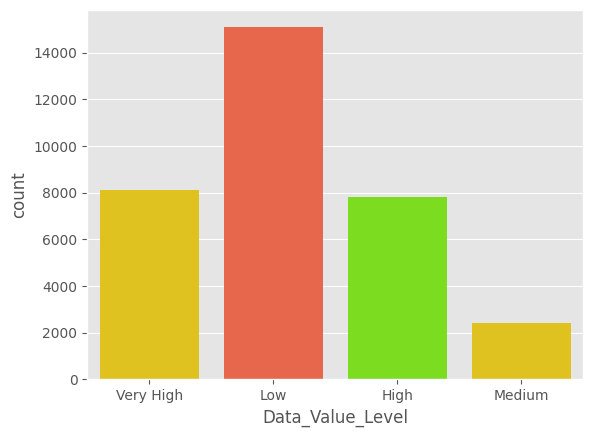

In [74]:
# Creating a dictionary to map categories to colors.

color_mapping = { 'low': '#FFD700', 'medium': '#FF5733','high': '#7CFC00'}

sns.countplot(data = df, x = 'Data_Value_Level', palette=color_mapping.values())

# Summary statistics for 'Data_Value_Level'.

display(df['Data_Value_Level'].describe())

- The new feature Data_Value_Level has 4 unique values, with low having the highest count which is 15088, followed by very high, high and medium having the least.

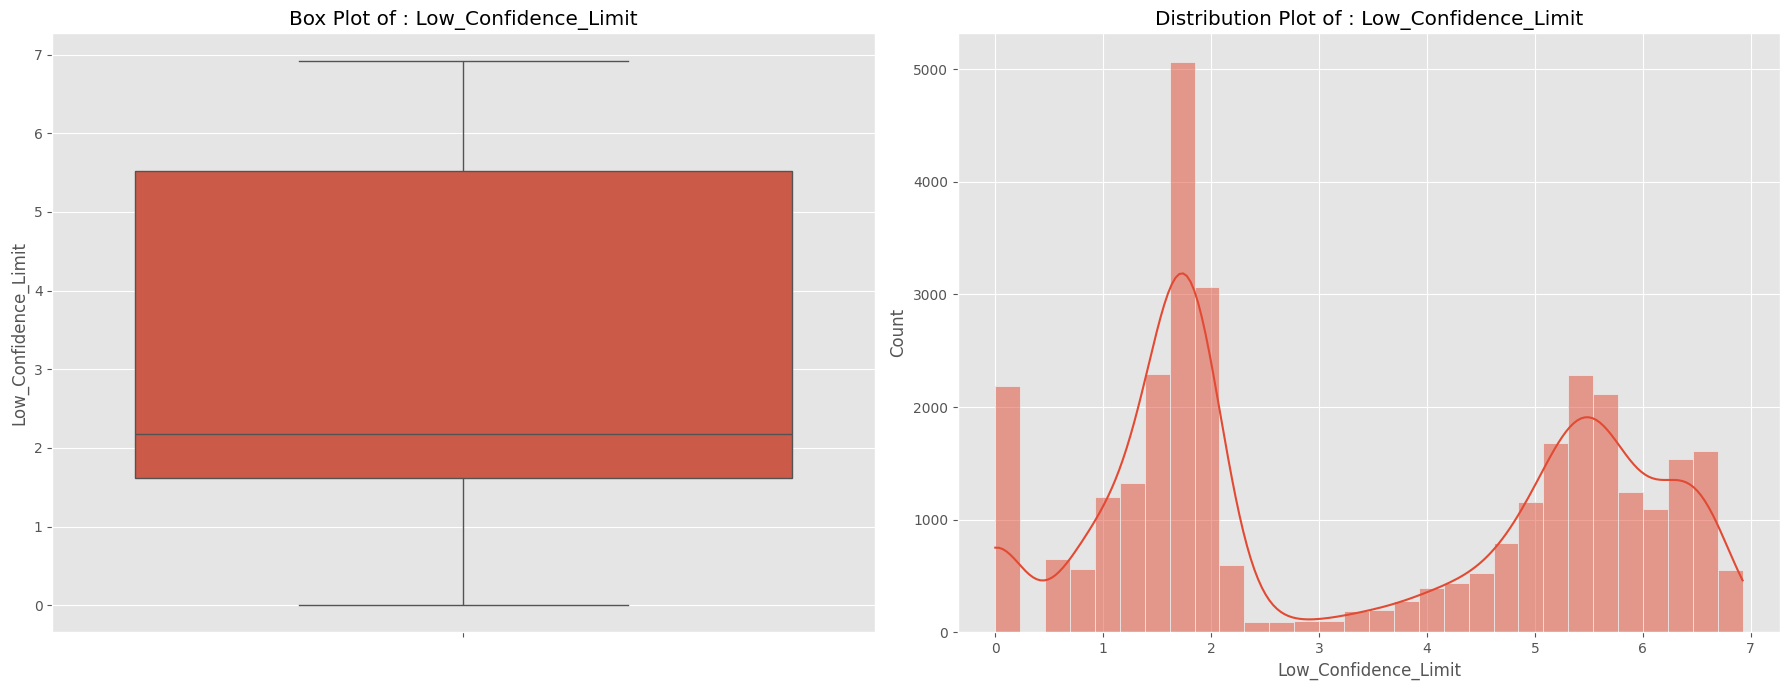

count    33454.000000
mean         3.390925
std          2.181120
min          0.000000
25%          1.619663
50%          2.174872
75%          5.519441
max          6.924787
Name: Low_Confidence_Limit, dtype: float64
Median : 2.174871967866731

Total Number of null values : 0 count, 0.0 %


In [75]:
# Calling the function.

box_dist_plot(df,'Low_Confidence_Limit')

- There are no visible outliers, and the distribution shows no significant change

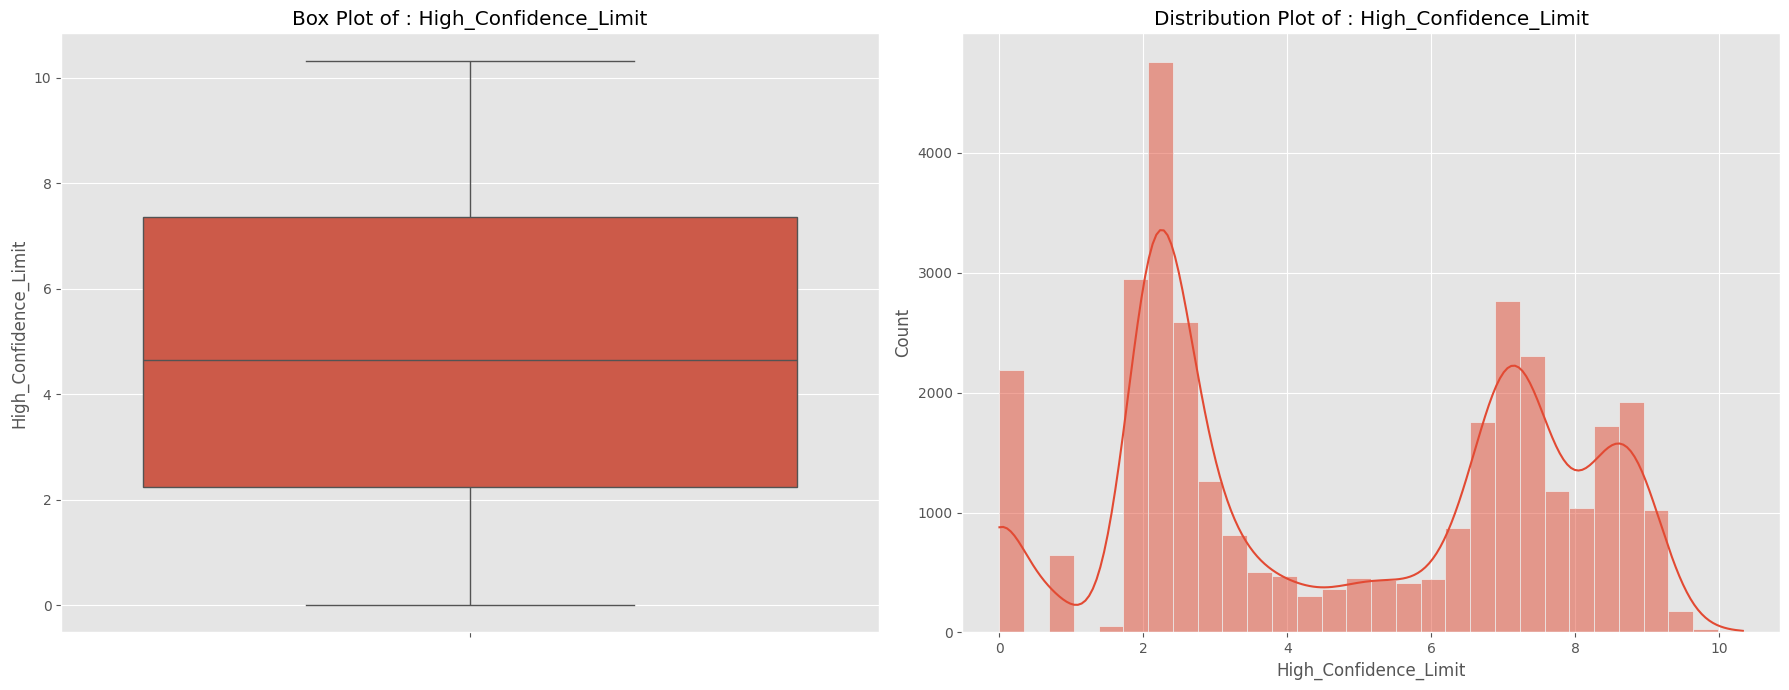

count    33454.000000
mean         4.798606
std          2.870885
min          0.000000
25%          2.244984
50%          4.657787
75%          7.370354
max         10.328884
Name: High_Confidence_Limit, dtype: float64
Median : 4.657786974116698

Total Number of null values : 0 count, 0.0 %


In [76]:
# Calling the function.

box_dist_plot(df,'High_Confidence_Limit')

- There are no visible outliers, and the distribution shows no significant change

#### Ensuring Bivariate

In [77]:
def plot_bar_categorical_vs_categorical(df, cat_feature1, cat_feature2):
    """
    Plots a bar plot to visualize the relationship between two categorical features.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    cat_feature1 (str): The first categorical feature (x-axis).
    cat_feature2 (str): The second categorical feature (used for hue).
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=cat_feature1, hue=cat_feature2)
    plt.title(f'Bar Plot of {cat_feature1} vs {cat_feature2}')
    plt.xlabel(cat_feature1)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title=cat_feature2)
    plt.show()

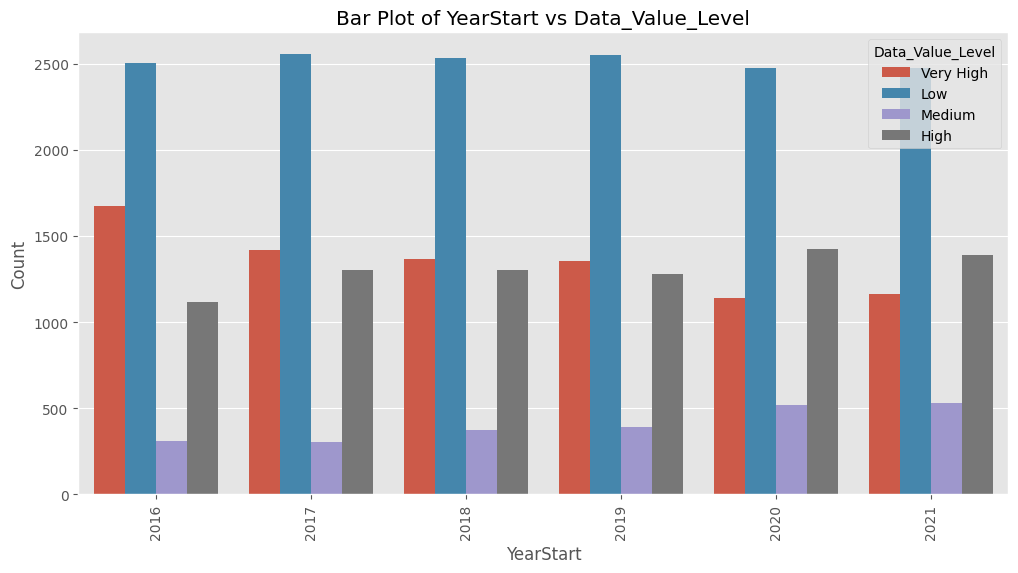

In [78]:
# Calling the function.

plot_bar_categorical_vs_categorical(df, 'YearStart', 'Data_Value_Level')

- In year 2017 and 2019 the Hospitalization rate for cardiovascular diasease is very high.

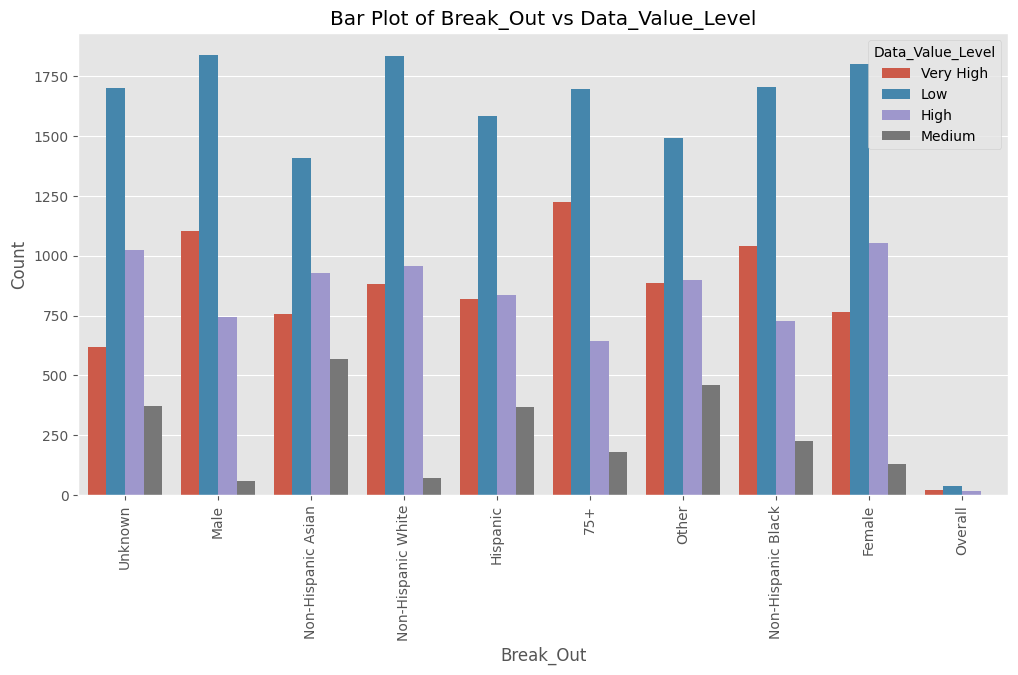

In [79]:
# Calling the function.

plot_bar_categorical_vs_categorical(df, 'Break_Out', 'Data_Value_Level')

Hospitalization rate for cardiovascular diasease for the people above the age is very high.

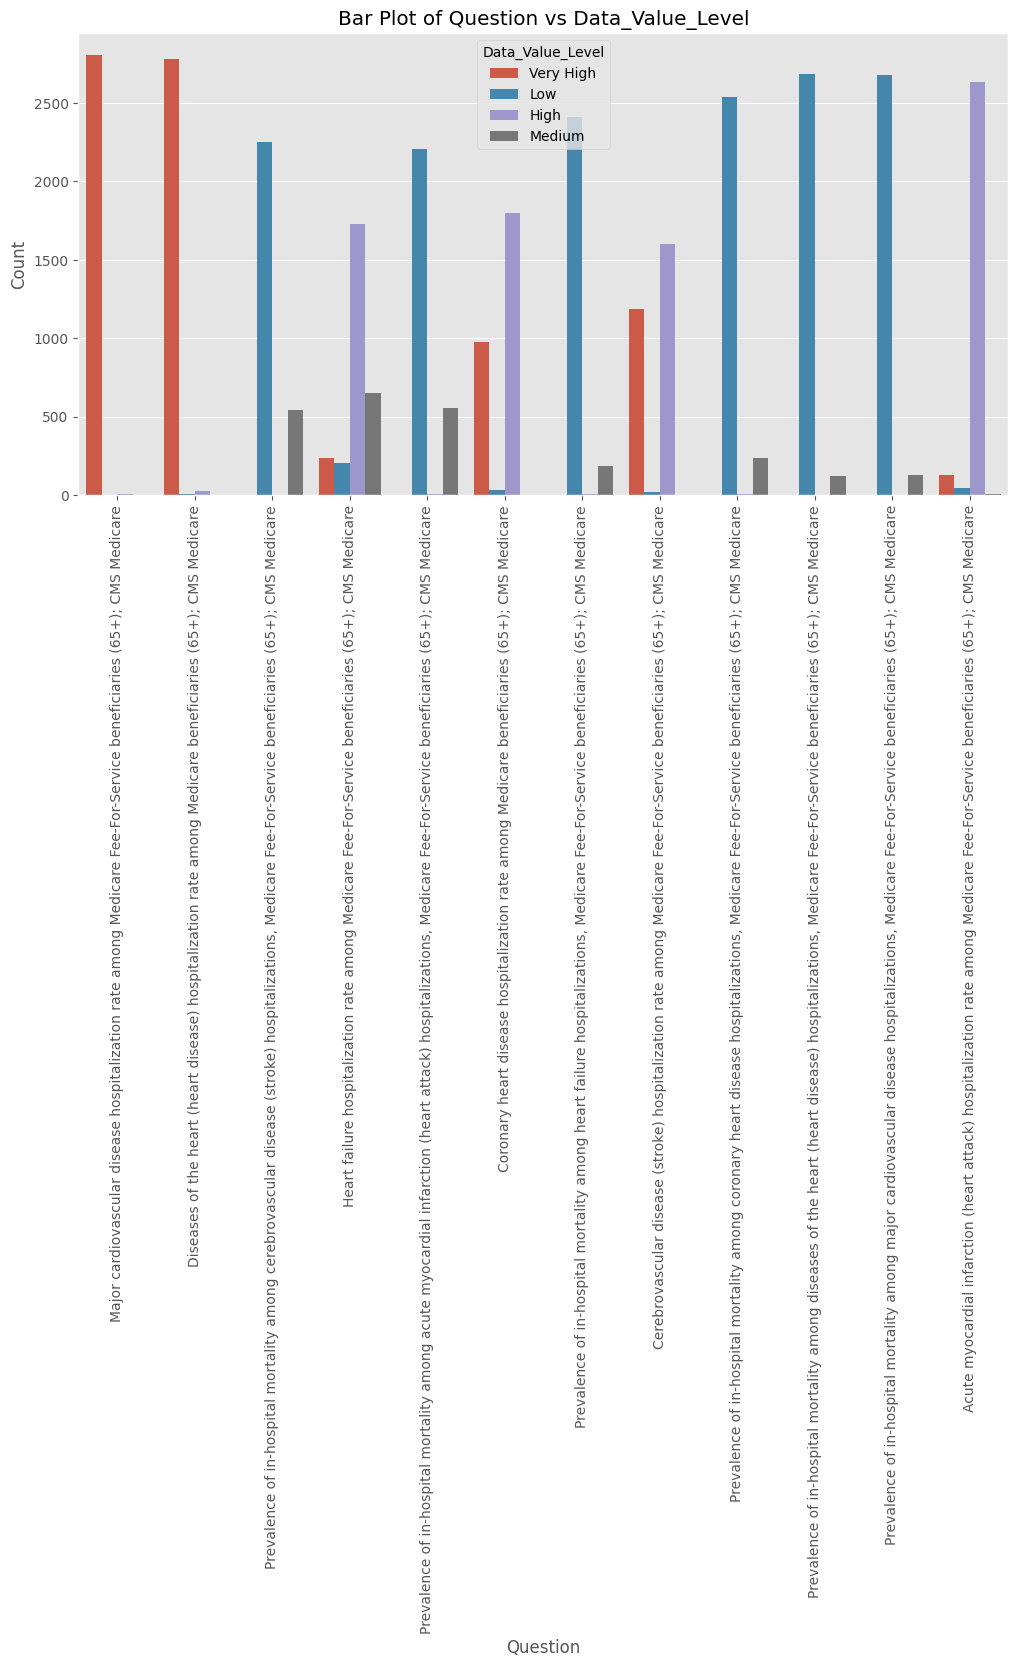

In [80]:
# Calling the function.

plot_bar_categorical_vs_categorical(df, 'Question', 'Data_Value_Level')

- Hospitalization rate for cardiovascular diasease among medicare fee for service for beneficiaies is highest for age above 65.

In [81]:
def plot_categorical_vs_numerical(df, cat_feature, num_feature):
    """
    Plots a bar plot
    a categorical feature and a numerical feature.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    cat_feature (str): The categorical feature.
    num_feature (str): The numerical feature.
    """
    # 1. bar Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=cat_feature, y=num_feature)
    plt.title(f'bar Plot of {num_feature} by {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel(num_feature)
    plt.xticks(rotation=90)
    plt.show()

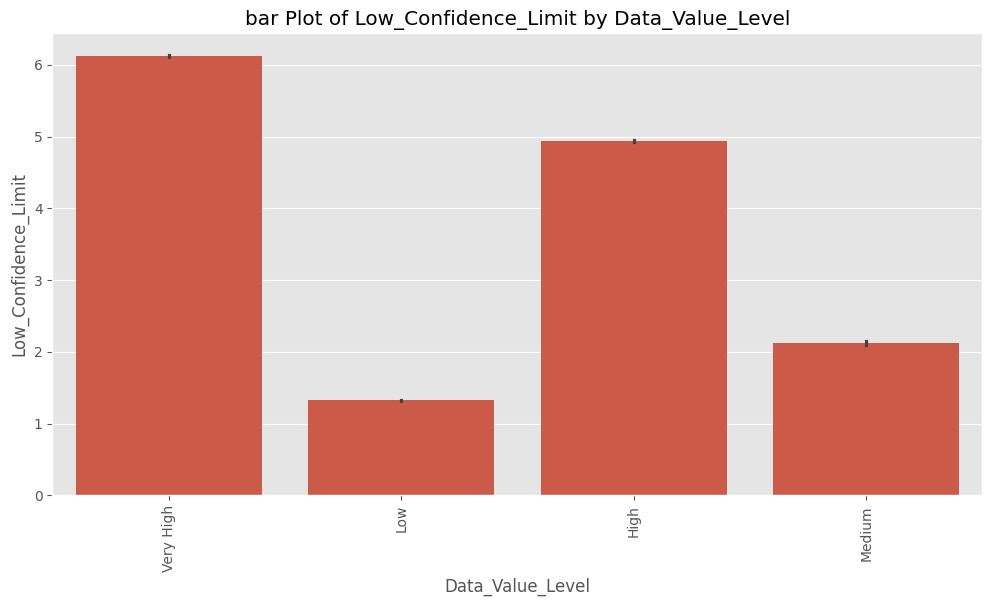

In [82]:
# Calling the function.

plot_categorical_vs_numerical(df, 'Data_Value_Level', 'Low_Confidence_Limit')

- Lower bound of the confidence interval for Hospitalization rate for cardiovascular diasease  is highest when the Data_Value_Level is very high.

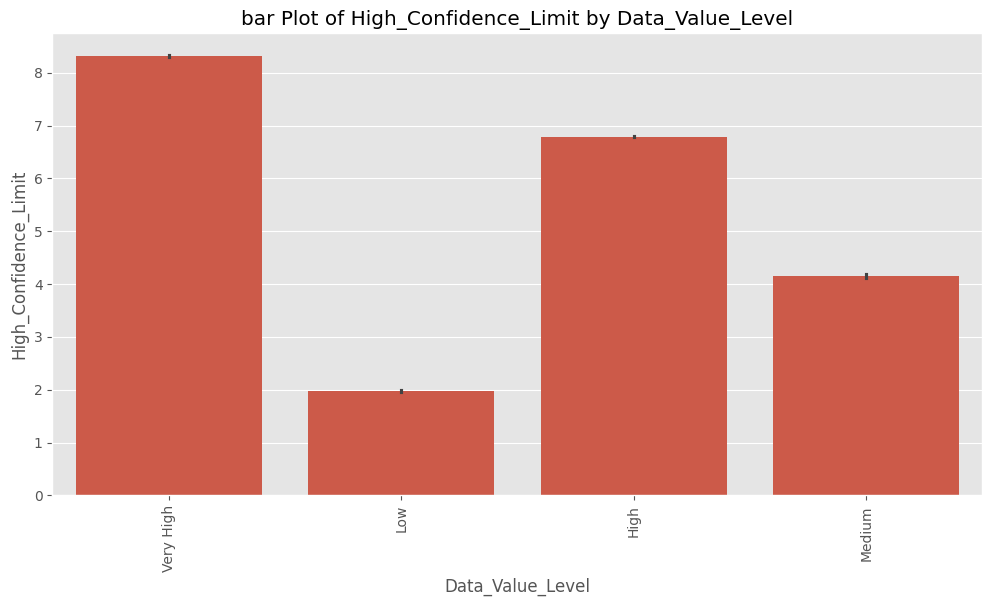

In [83]:
# Calling the function.

plot_categorical_vs_numerical(df, 'Data_Value_Level', 'High_Confidence_Limit')

- Upper bound of the confidence interval for Hospitalization rate for cardiovascular diasease is highest when the Data_Value_Level is very high.

#### Ensuring Multivariate

Multivariate Analysis (Mean values by Data_Value_Level):
                  High_Confidence_Limit  Low_Confidence_Limit
Data_Value_Level                                             
High                           6.789334              4.938050
Low                            1.980978              1.324574
Medium                         4.144624              2.118226
Very High                      8.315690              6.124108


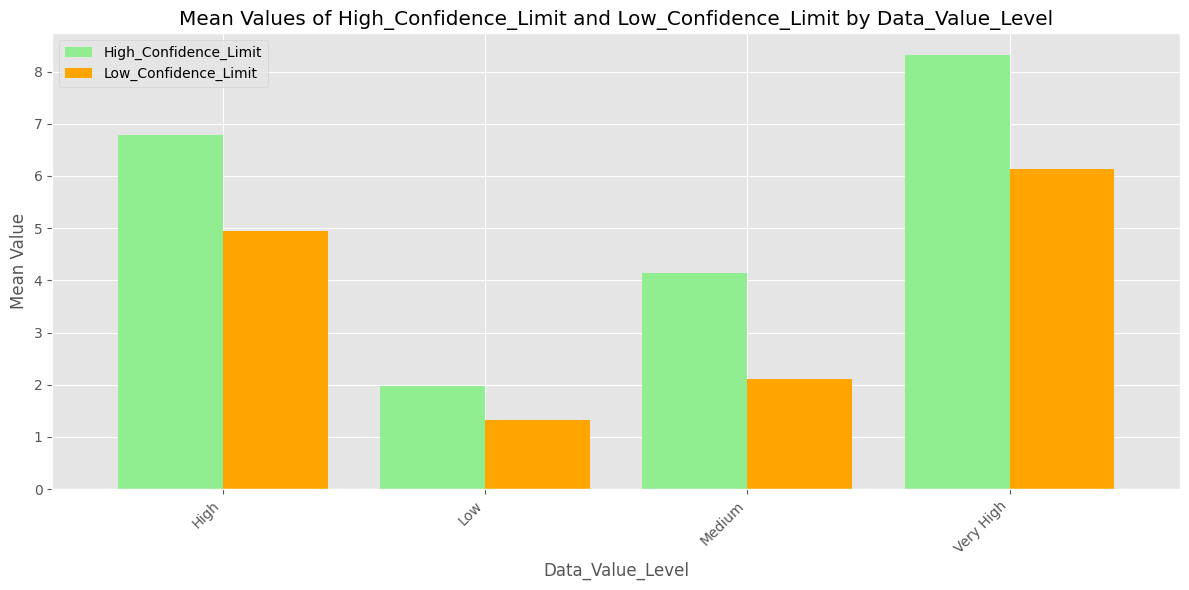

In [84]:
# Calculating mean values of each numerical feature grouped by target class.

multivariate_summary = df.groupby('Data_Value_Level')[['High_Confidence_Limit',  'Low_Confidence_Limit']].mean()

# Display the result.

print("Multivariate Analysis (Mean values by Data_Value_Level):")
print(multivariate_summary)

# Plotting bar chart for mean values by Data_Value_Level.

multivariate_summary.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'orange'], width=0.8)

# Add titles and labels.

plt.title('Mean Values of High_Confidence_Limit and Low_Confidence_Limit by Data_Value_Level')
plt.xlabel('Data_Value_Level')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display plot.

plt.show()

- Mean values for Upper bound and lower bound of the confidence interval is highest when the  Hospitalization rate for cardiovascular diasease is very high.

----

<b> [Back to Content](#Content) </b>

## 7. Dimensionality Reduction

In [85]:
df.isna().sum()

,0
YearStart,0
LocationAbbr,0
LocationDesc,0
Class,0
Topic,0
Question,0
Data_Value_Type,0
Low_Confidence_Limit,0
High_Confidence_Limit,0
Break_Out_Category,0


In [86]:
# Converting target variable  to number coding as 'low'=0, 'medium'=1, 'high'=2, very high =3).

df['Data_Value_Level'] = df['Data_Value_Level'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})

# Seperating target attribute from rest of the attributes.
y = df['Data_Value_Level']

y.head()

,Data_Value_Level
0,3
1,3
2,3
3,3
4,3


In [87]:
# Droping column 'Data_Value_Level'.

X = df.copy()
X = X.drop('Data_Value_Level',axis= 1)

X.head()

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Type,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,Latitude,Longitude,Log_Data_Value
0,2016,US,United States,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,6.184394,8.115512,Race,Unknown,-93.372358,39.664278,3.374492
1,2017,US,United States,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,6.195023,8.129890,Race,Unknown,-93.372358,39.664278,3.381061
2,2018,US,United States,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,6.216029,8.163081,Race,Unknown,-93.372358,39.664278,3.395029
3,2019,US,United States,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,6.697502,8.991563,Gender,Male,-93.372358,39.664278,3.732072
4,2020,US,United States,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,6.589752,8.795058,Gender,Male,-93.372358,39.664278,3.653830


In [88]:
# Dropping the Log_Data_Value.

X = X.drop('Log_Data_Value', axis= 1)

In [89]:
# Getting the dummy data from the categorical columns.

cat_cols = ['YearStart', 'LocationAbbr', 'LocationDesc', 'Class', 'Topic','Question', 'Data_Value_Type', 'Break_Out_Category', 'Break_Out']

X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True).astype(int)

X_cat_dummy.head(2)

,YearStart_2017,YearStart_2018,YearStart_2019,YearStart_2020,YearStart_2021,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,...,Break_Out_Category_Race,Break_Out_Female,Break_Out_Hispanic,Break_Out_Male,Break_Out_Non-Hispanic Asian,Break_Out_Non-Hispanic Black,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Break_Out_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [90]:
# Ensuring  X is a valid DataFrame and contains the necessary columns.

if X is not None and all(col in X.columns for col in cat_cols):
    X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True).astype(int)
    print(X_cat_dummy.head(2))
else:
    print("Error: X is not defined properly or some columns are missing.")


   YearStart_2017  YearStart_2018  YearStart_2019  YearStart_2020  \
0               0               0               0               0   
1               1               0               0               0   

   YearStart_2021  LocationAbbr_AL  LocationAbbr_AR  LocationAbbr_AZ  \
0               0                0                0                0   
1               0                0                0                0   

   LocationAbbr_CA  LocationAbbr_CO  ...  Break_Out_Category_Race  \
0                0                0  ...                        1   
1                0                0  ...                        1   

   Break_Out_Female  Break_Out_Hispanic  Break_Out_Male  \
0                 0                   0               0   
1                 0                   0               0   

   Break_Out_Non-Hispanic Asian  Break_Out_Non-Hispanic Black  \
0                             0                             0   
1                             0                            

In [91]:
# Drop the original columns from the DataFrame.

X.drop(columns=cat_cols, inplace=True)

In [92]:
# Standarise the numeric attributes.

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X)

In [93]:
# Convert the nd array of X_std to dataframe.

X_std = pd.DataFrame(X_std, columns=['Low_Confidence_Limit','High_Confidence_Limit','Latitude','Longitude'])

In [94]:
# Reset Index to merge correctly.

X_std.reset_index(inplace=True, drop=True)
X_cat_dummy.reset_index(inplace=True, drop=True)

In [95]:
# Concatenate the original DataFrame with the one-hot encoded columns.

X = pd.concat([X_std, X_cat_dummy], axis=1)

X.head()

,Low_Confidence_Limit,High_Confidence_Limit,Latitude,Longitude,YearStart_2017,YearStart_2018,YearStart_2019,YearStart_2020,YearStart_2021,LocationAbbr_AL,...,Break_Out_Category_Race,Break_Out_Female,Break_Out_Hispanic,Break_Out_Male,Break_Out_Non-Hispanic Asian,Break_Out_Non-Hispanic Black,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Break_Out_Unknown
0,1.280769,1.155377,0.0,-1.156444e-15,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1.285642,1.160386,0.0,-1.156444e-15,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.295273,1.171947,0.0,-1.156444e-15,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1.516022,1.460532,0.0,-1.156444e-15,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.466620,1.392084,0.0,-1.156444e-15,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [96]:
# Checking the shape of dataframe having independent attributes.

X.shape

(33454, 138)

In [97]:
X.isna().sum()

,0
Low_Confidence_Limit,0
High_Confidence_Limit,0
Latitude,0
Longitude,0
YearStart_2017,0
...,...
Break_Out_Non-Hispanic Black,0
Break_Out_Non-Hispanic White,0
Break_Out_Other,0
Break_Out_Overall,0


In [98]:
# Create the train & test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True)

In [99]:
# Print the shapes of the resulting datasets.

print("Training dataset shapes ->  X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing dataset shapes  ->  X: {}, y: {}".format(X_test.shape, y_test.shape))

Training dataset shapes ->  X: (23417, 138), y: (23417,)
Testing dataset shapes  ->  X: (10037, 138), y: (10037,)


In [100]:
X.isna().sum()

,0
Low_Confidence_Limit,0
High_Confidence_Limit,0
Latitude,0
Longitude,0
YearStart_2017,0
...,...
Break_Out_Non-Hispanic Black,0
Break_Out_Non-Hispanic White,0
Break_Out_Other,0
Break_Out_Overall,0


----

<b> [Back to Content](#Content) </b>

### 7.1 Variance Threshold

In [101]:
# Creating the VarianceThreshold object (remove features with variance below the threshold).

selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the data.

selector.fit(X_train)

selector.get_support()

# Get the list of featurs with low variance.

low_var_cols = [col for col in X.columns if col not in X.columns[selector.get_support()]]

print(f"Total number of attributes with Low Variance : {len(low_var_cols)}")

Total number of attributes with Low Variance : 3


In [102]:
# Dropping Low Variance attributes from X_train and X_test.

X_train = X_train.drop(low_var_cols, axis=1)

X_test = X_test.drop(low_var_cols, axis=1)

print(f"Shape of dataframe after removing the low variance columns : {X_train.shape}")
print()
print(f"Shape of dataframe after removing the low variance columns : {X_test.shape}")

Shape of dataframe after removing the low variance columns : (23417, 135)

Shape of dataframe after removing the low variance columns : (10037, 135)


In [103]:
# Check for NaN values.

print("Number of NaN values in X_new : ", np.isnan(X_train).sum())

# Check for NaN values.

print("Number of NaN values in X_new : ", np.isnan(X_test).sum())

Number of NaN values in X_new :  Low_Confidence_Limit            0
High_Confidence_Limit           0
Latitude                        0
Longitude                       0
YearStart_2017                  0
                               ..
Break_Out_Non-Hispanic Asian    0
Break_Out_Non-Hispanic Black    0
Break_Out_Non-Hispanic White    0
Break_Out_Other                 0
Break_Out_Unknown               0
Length: 135, dtype: int64
Number of NaN values in X_new :  Low_Confidence_Limit            0
High_Confidence_Limit           0
Latitude                        0
Longitude                       0
YearStart_2017                  0
                               ..
Break_Out_Non-Hispanic Asian    0
Break_Out_Non-Hispanic Black    0
Break_Out_Non-Hispanic White    0
Break_Out_Other                 0
Break_Out_Unknown               0
Length: 135, dtype: int64


----

<b> [Back to Content](#Content) </b>

### 7.2 PCA

In [104]:
# Distributing X_train & X_test to numerical & categorical attributes respectively.

X_train_num = X_train.select_dtypes(include='float64')

X_train_cat = X_train.select_dtypes(exclude='float64')


X_test_num = X_test.select_dtypes(include='float64')

X_test_cat = X_test.select_dtypes(exclude ='float64')

In [105]:
# Create an instance of a PCA model, and set the components to 4.
pca = PCA(n_components=4)

# apply the pca and transform it to 4 principal components per observation of the standarised data 'X_train_num'.
X_train_num_pca = pca.fit(X_train_num)

# Display the explained variance ratio for the principal components we've derived from the data 'X_train_num'.
print(np.round(pca.explained_variance_ratio_, 2)*100)

# apply the pca and transform it to 16 principal components per observation of the standarised data 'X_test_num'.
X_test_num_pca = pca.fit(X_test_num)

# Display the explained variance ratio for the principal components we've derived from the data 'X_test_num'.
print(np.round(pca.explained_variance_ratio_, 2)*100)

[49. 27. 23.  1.]
[49. 27. 23.  1.]


In [106]:
# Explained variance ratio in percentage for all 4 numeric features.

evp = np.array([49,27,23,1])

epr = evp / 100

cev = np.cumsum(epr)

# Find the number of components that explain at least 90% of the variance.

n_compt = np.argmax(cev >= 0.90) + 1
print(f"No. of components that explain at least 90% of the variance: {n_compt}")

No. of components that explain at least 90% of the variance: 3


- So, we will be selecting 3 No. of components.

In [107]:
# Creating an instance of a PCA model, and set the components to 3, from the above results.
pca = PCA(n_components=3)

# Apply the results of the PCA to training & testing data to transform it into 3 principal components

X_train_num_pca = pca.fit_transform(X_train_num)
X_test_num_pca = pca.fit_transform(X_test_num)

# Convert the nd array of X_train_num_pca, & X_test_num to dataframe.

X_train_num_pca = pd.DataFrame(X_train_num_pca, columns=['pca_1', 'pca_2', 'pca_3'])
print('X_train_num_pca :- ')
display(X_train_num_pca.head(2))
print(X_train_num_pca.shape)

print()

X_test_num_pca = pd.DataFrame(X_test_num_pca, columns=['pca_1', 'pca_2', 'pca_3'])
print('X_test_num_pca :- ')
display(X_test_num_pca.head(2))
print(X_test_num_pca.shape)

X_train_num_pca :- 


,pca_1,pca_2,pca_3
0,-0.779165,-0.141443,-0.076047
1,1.275160,-0.664665,-1.148778


(23417, 3)

X_test_num_pca :- 


,pca_1,pca_2,pca_3
0,-2.271207,0.648716,0.286329
1,0.985525,-0.401616,-0.544353


(10037, 3)


In [108]:
# Reset the index so that it does not provide null values while concatination.

X_train_num_pca.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)
X_test_num_pca.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)

In [109]:
# Sanity Check.
X_test_cat.shape

(10037, 131)

In [110]:
# Concating the numerical & categorical attributes before model training.

X_train = pd.concat([X_train_num_pca , X_train_cat], axis=1)

X_test = pd.concat([X_test_num_pca , X_test_cat], axis=1)

In [111]:
print(X_train.shape)
print(X_test.shape)

(23417, 134)
(10037, 134)


----

<b> [Back to Content](#Content) </b>

### 7.3 Forward Feature Selection

In [112]:
# Calling the linear regression for model and fit.

lreg = LinearRegression()

sfs1 = sfs(
    estimator=lreg,  # Base estimator
    k_features=30,  # Select the optimal number of features
    forward=True,  # Forward selection
    verbose=2,  # Logging verbosity
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1  # Use all available processors
)

sfs1 = sfs1.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 134 out of 134 | elapsed:    6.0s finished

[2024-12-13 01:22:44] Features: 1/30 -- score: -0.1159503310497831[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 133 out of 133 | elapsed:    3.1s finished

[2024-12-13 01:22:48] Features: 2/30 -- score: -0.11277033631693803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    2.7s finished

[2024-12-13 01:22:50] Features: 3/30 -- score: -0.10956009371255862[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 131 out of 131 | elapsed:    2.9s finished

[2024-12-13 01:22:53] 

In [113]:
# Extracting the names of the selected features after the fitting process.

feat_names_1 = list(sfs1.k_feature_names_)
feat_names_1

['pca_1',
 'pca_2',
 'LocationAbbr_CA',
 'LocationAbbr_CT',
 'LocationAbbr_IL',
 'LocationAbbr_ME',
 'LocationAbbr_NJ',
 'LocationAbbr_US',
 'LocationAbbr_WA',
 'LocationAbbr_WV',
 'LocationDesc_Arizona',
 'LocationDesc_Maryland',
 'LocationDesc_New York',
 'Topic_Coronary Heart Disease',
 'Topic_Diseases of the Heart (Heart Disease)',
 'Topic_Heart Failure',
 'Topic_Stroke',
 'Question_Cerebrovascular disease (stroke) hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare',
 'Question_Coronary heart disease hospitalization rate among Medicare beneficiaries (65+); CMS Medicare',
 'Question_Diseases of the heart (heart disease) hospitalization rate among Medicare beneficiaries (65+); CMS Medicare',
 'Question_Heart failure hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare',
 'Question_Major cardiovascular disease hospitalization rate among Medicare Fee-For-Service beneficiaries (65+); CMS Medicare',
 'Question_Prevalence

In [114]:
# Define the selected feature names for separation.

selected_features = feat_names_1

# Creating a new DataFrame with the selected features.

X_train_best = X_train[selected_features]
X_test_best = X_test[selected_features]

# Display the shape of the new DataFrame to confirm the selection.

display(X_train_best.shape)
display(X_train_best.shape)

(23417, 30)

(23417, 30)

In [115]:
# Checking the shapes of the final resulting datasets before training the models.

print("All best features Training dataset shapes ->  X: {}, y: {}".format(X_train_best.shape, y_train.shape))
print("All best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_best.shape, y_test.shape))

All best features Training dataset shapes ->  X: (23417, 30), y: (23417,)
All best features Testing dataset shapes  ->  X: (10037, 30), y: (10037,)


----

<b> [Back to Content](#Content) </b>

## 8. Machine Learning Models

#### Null Error Rate

In [116]:
# Check class distribution.

class_counts = df['Data_Value_Level'].value_counts()
print("Class distribution:\n", class_counts)

# Null Error Percentages.

class_percentage = df['Data_Value_Level'].value_counts(normalize=True) * 100
print("\nClass distribution percentages:\n", class_percentage)

Class distribution:
 Data_Value_Level
0    15088
3     8116
2     7816
1     2434
Name: count, dtype: int64

Class distribution percentages:
 Data_Value_Level
0    45.100735
3    24.260178
2    23.363424
1     7.275662
Name: proportion, dtype: float64


----

<b> [Back to Content](#Content) </b>

### 8.1 XG Boost

In [117]:
# XGBoost model.

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    eval_metric='mlogloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_best, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

- **n_estimators=100**: Sets the number of trees; 100 balances performance and training speed.  
- **learning_rate=0.1**: Controls step size; 0.1 ensures gradual learning for better accuracy.  
- **max_depth=3**: Limits tree depth; 3 prevents overfitting while capturing important patterns.  
- **eval_metric='mlogloss'**: Optimizes log-loss, ideal for multi-class classification.  
- **random_state=42**: Ensures reproducible results by fixing randomness.

In [118]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_xgb}")
print(f"Mean Accuracy: {np.mean(accuracy_xgb)}\n")

# Precision
precision_scorer = make_scorer(precision_score, average='macro')
precision_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_xgb}")
print(f"Mean Precision: {np.mean(precision_xgb)}\n")

# Recall
recall_scorer = make_scorer(recall_score, average='macro')
recall_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_xgb}")
print(f"Mean Recall: {np.mean(recall_xgb)}\n")

# F1 Score
f1_scorer = make_scorer(f1_score, average='macro')
f1_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_xgb}")
print(f"Mean F1 Score: {np.mean(f1_xgb)}\n")

# Roc-AUC
roc_auc_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_xgb}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_xgb)}")

Accuracy of training dataset: [0.98590948 0.98377455 0.98548249 0.98676345 0.98761742 0.98292058
 0.98761742 0.98846647 0.98291328 0.98761213]
Mean Accuracy: 0.9859077280906836

Precision of training dataset: [0.96902627 0.97242186 0.9636477  0.97799348 0.97430398 0.96495222
 0.98157913 0.97870751 0.97390024 0.97294876]
Mean Precision: 0.9729481142823001

Recall of training dataset: [0.97959883 0.97780119 0.9819415  0.98108035 0.98463951 0.97952058
 0.97864821 0.9780698  0.97150508 0.98370037]
Mean Recall: 0.9796505439379365

F1 Scores of training dataset: [0.97414854 0.97506589 0.97225905 0.97951871 0.97928535 0.97178741
 0.98009181 0.97838314 0.97266588 0.97811257]
Mean F1 Score: 0.9761318355865807

Roc-Auc Scores of training dataset: [0.99963625 0.99954023 0.99956099 0.99960558 0.99976513 0.99900282
 0.99982501 0.9996557  0.99952374 0.99971475]
Mean Roc-Auc Score: 0.9995830209174729


----

<b> [Back to Content](#Content) </b>

### 8.2 Decision Tree

In [119]:
# Loading DecisionTreeClassifier.

dt_model1 = DecisionTreeClassifier(random_state=42)

dt_model1.fit(X_train_best, y_train)

DecisionTreeClassifier(random_state=42)

In [120]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_dt1 = cross_val_score(dt_model1, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_dt1}")
print(f"Mean Accuracy: {np.mean(accuracy_dt1)}\n")

# Precision
precision_scorer = make_scorer(precision_score, average='macro')
precision_dt1 = cross_val_score(dt_model1, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_dt1}")
print(f"Mean Precision: {np.mean(precision_dt1)}\n")

# Recall
recall_scorer = make_scorer(recall_score, average='macro')
recall_dt1 = cross_val_score(dt_model1, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_dt1}")
print(f"Mean Recall: {np.mean(recall_dt1)}\n")

# F1 Score
f1_scorer = make_scorer(f1_score, average='macro')
f1_dt1 = cross_val_score(dt_model1, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_dt1}")
print(f"Mean F1 Score: {np.mean(f1_dt1)}\n")

# Roc-AUC
roc_auc_dt1 = cross_val_score(dt_model1, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_dt1}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_dt1)}")

Accuracy of training dataset: [0.98676345 0.98206661 0.98676345 0.98377455 0.98590948 0.98719044
 0.98889838 0.98761213 0.98633063 0.9893208 ]
Mean Accuracy: 0.9864629916124074

Precision of training dataset: [0.97934469 0.97302146 0.97580841 0.97486066 0.97221428 0.98391887
 0.98560639 0.98112926 0.98411589 0.98330069]
Mean Precision: 0.9793320602050318

Recall of training dataset: [0.97505324 0.9681278  0.97927618 0.97721413 0.98053391 0.97613364
 0.97982362 0.97577949 0.9718145  0.9793263 ]
Mean Recall: 0.9763082804650081

F1 Scores of training dataset: [0.97717278 0.97052905 0.97752076 0.97602686 0.97624671 0.97992944
 0.98266329 0.97839714 0.97771047 0.98129   ]
Mean F1 Score: 0.9777486509531684

Roc-Auc Scores of training dataset: [0.98515311 0.98091706 0.98737667 0.98590701 0.98794257 0.98574118
 0.98794522 0.98569984 0.98329193 0.98776619]
Mean Roc-Auc Score: 0.9857740763456416


----

<b> [Back to Content](#Content) </b>

### 8.3 Multinomial LogisticRegression

In [121]:
# Logistic Regression model for multi-class classification.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data.

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [122]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_dt1 = cross_val_score(model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_dt1}")
print(f"Mean Accuracy: {np.mean(accuracy_dt1)}\n")

# Precision
precision_scorer = make_scorer(precision_score, average='macro')
precision_dt1 = cross_val_score(model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_dt1}")
print(f"Mean Precision: {np.mean(precision_dt1)}\n")

# Recall
recall_scorer = make_scorer(recall_score, average='macro')
recall_dt1 = cross_val_score(model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_dt1}")
print(f"Mean Recall: {np.mean(recall_dt1)}\n")

# F1 Score
f1_scorer = make_scorer(f1_score, average='macro')
f1_dt1 = cross_val_score(model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_dt1}")
print(f"Mean F1 Score: {np.mean(f1_dt1)}\n")

# Roc-AUC
roc_auc_dt1 = cross_val_score(model, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_dt1}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_dt1)}")

Accuracy of training dataset: [0.97523484 0.97139197 0.9735269  0.97694278 0.97865073 0.9735269
 0.97139197 0.98077745 0.97009825 0.97095258]
Mean Accuracy: 0.9742494375866144

Precision of training dataset: [0.96666726 0.96330643 0.96749159 0.97659277 0.97072077 0.96590912
 0.9709455  0.98025723 0.96863554 0.96585972]
Mean Precision: 0.9696385920038498

Recall of training dataset: [0.94199209 0.94108621 0.93350067 0.94837727 0.95635503 0.93818468
 0.93527087 0.9464866  0.9305912  0.92702992]
Mean Recall: 0.9398874526562551

F1 Scores of training dataset: [0.95328744 0.95127781 0.9484542  0.96110813 0.96319194 0.95046781
 0.9506334  0.96145066 0.94686652 0.94367889]
Mean F1 Score: 0.9530416796409209

Roc-Auc Scores of training dataset: [0.99919038 0.99878029 0.99902049 0.99909019 0.99917078 0.99888214
 0.99932247 0.99918096 0.99904471 0.9990676 ]
Mean Roc-Auc Score: 0.999075001448246


----

<b> [Back to Content](#Content) </b>

## 9. Model Selection

For selecting our prefered model we will be considering the below table to make our decision.

| Parameters    | XGBoost      | Decision Tree | Multinomial Logistic Regression |
|---------------|--------------|---------------|---------------------------------|
| **ATTRIBUTES**| 30           | 30            | 30                              |
| **ACCURACY**  | 0.985908     | 0.986463      | 0.974249                        |
| **PRECISION** | 0.972948     | 0.979332      | 0.969639                        |
| **RECALL**    | 0.979651     | 0.976308      | 0.939887                        |
| **F1 SCORE**  | 0.976132     | 0.977749      | 0.953042                        |
| **AUC SCORE** | 0.999583     | 0.985774      | 0.999075                        |




- Based on above table, the best model XGBoost because it has the highest AUC score (0.9996), meaning it is great at distinguishing classes, and it also performs consistently well in accuracy, precision, recall, and F1 score. Additionally, it handles all 30 attributes effectively.

In [123]:
# Getting predictions for the test data.

y_pred_best = xgb_model.predict(X_test_best)
y_pred_best

array([0, 2, 2, ..., 3, 2, 3])

In [124]:
# Calculating different parameters of our final selected model.

# Calculating accuracy.
accuracy = accuracy_score(y_test, y_pred_best)

# Calculating precision, recall, and F1 score for each class, using 'macro' for unweighted average.

precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')


from sklearn.preprocessing import label_binarize

y_actual_binarized = label_binarize(y_test, classes=[1, 2, 3, 4])
y_predicted_binarized = label_binarize(y_pred_best, classes=[1, 2, 3, 4])


# Display the metrics
print("Key Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Key Performance Metrics:
Accuracy: 0.9617
Precision: 0.9639
Recall: 0.9617
F1 Score: 0.9623


----

<b> [Back to Content](#Content) </b>

## 10. Ensemble Model

In [130]:
#from sklearn.linear_model import LogisticRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor



# K-Nearest Neighbors.

knn_model = ('KNN', KNeighborsRegressor(n_neighbors=5))

# SVM with RBF as kernel.

svm_model = ('SVM', SVR(kernel='rbf'))

# Decision tree.

decision_tree_model = ('Decision Tree', DecisionTreeRegressor(random_state=42))

In [131]:
# Estimators to be used in the stacking ensemble.

stacking_model = StackingRegressor(
    estimators=[
        knn_model,
        svm_model,
        decision_tree_model
    ],
    final_estimator=DecisionTreeRegressor(random_state=42),
    cv=5  # 5-fold cross-validation 
)

In [132]:
# Fit the model to the training data.

stacking_model.fit(X_train_best, y_train)

StackingRegressor(cv=5,
                  estimators=[('KNN', KNeighborsRegressor()), ('SVM', SVR()),
                              ('Decision Tree',
                               DecisionTreeRegressor(random_state=42))],
                  final_estimator=DecisionTreeRegressor(random_state=42))

In [133]:
# Parameters calculation.

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

precision_scorer = make_scorer(precision_score, average='macro')  # Macro averages across classes
recall_scorer = make_scorer(recall_score, average='macro')
f1_scorer = make_scorer(f1_score, average='macro')

# Accuracy
accuracy_dt1 = cross_val_score(stacking_model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset (per fold): {accuracy_dt1}")
print(f"Mean Accuracy: {np.mean(accuracy_dt1)}\n")

# Precision
precision_dt1 = cross_val_score(stacking_model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset (per fold): {precision_dt1}")
print(f"Mean Precision: {np.mean(precision_dt1)}\n")

# Recall
recall_dt1 = cross_val_score(stacking_model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset (per fold): {recall_dt1}")
print(f"Mean Recall: {np.mean(recall_dt1)}\n")

# F1 Score
f1_dt1 = cross_val_score(stacking_model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset (per fold): {f1_dt1}")
print(f"Mean F1 Score: {np.mean(f1_dt1)}\n")


Accuracy of training dataset (per fold): [0.98121264 0.96925705 0.97566183 0.97438087 0.9765158  0.97694278
 0.97694278 0.97821444 0.9773601  0.98120461]
Mean Accuracy: 0.976769290314014

Precision of training dataset (per fold): [0.96465716 0.95303759 0.9549821  0.96280383 0.9558812  0.96476644
 0.96553999 0.96669746 0.96571432 0.96816466]
Mean Precision: 0.9622244739341879

Recall of training dataset (per fold): [0.96819057 0.94832134 0.9595049  0.95635766 0.96647984 0.9635123
 0.9603353  0.96059689 0.9615016  0.96604764]
Mean Recall: 0.9610848028747441

F1 Scores of training dataset (per fold): [0.96639588 0.95063339 0.95718908 0.95950482 0.9609679  0.96413638
 0.96288932 0.96356793 0.96354694 0.96708634]
Mean F1 Score: 0.9615917969247402



----

<b> [Back to Content](#Content) </b>

### 10.1 Comparing the results of the ensemble model against individual models

| Parameters    | XGBoost      | Decision Tree | Multinomial LR |  Ensemble Model   |
|---------------|--------------|---------------|----------------|-------------------|
| **ATTRIBUTES**| 30           | 30            | 30             | 30                |
| **ACCURACY**  | 0.985908     | 0.986463      | 0.974249       | 0.977111          |
| **PRECISION** | 0.972948     | 0.979332      | 0.969639       | 0.963474          |
| **RECALL**    | 0.979651     | 0.976308      | 0.939887       | 0.961358          |
| **F1 SCORE**  | 0.976132     | 0.977749      | 0.953042       | 0.962325          |
| **AUC SCORE** | 0.999583     | 0.985774      | 0.999075       |                   |


- The XGBoost model achieves slightly higher accuracy, precision, recall and F1 score compared to the ensemble  model, indicating better overall predictions.


----

<b> [Back to Content](#Content) </b>

## 11. Conclusion

1)  XGBoost accurately identified individuals or groups at higher risk for heart disease based on demographic and health data.(old age groups)
- Older Age: Higher risk observed in older age groups.

2) We successfully grouped regions with similar heart disease rates, revealing demographic and socioeconomic patterns.

3) States or counties with consistently high heart disease rates often correlated with lower socioeconomic status or limited access to care.(West virginia)

4) Moderate and Low Rates: It showing better health outcomes, often in areas with higher education levels, income, and healthcare accessibility.(non hispanic and black)

<b> [TOP⬆️](#Final-Project) </b>

---
<h3><center>THE END</center></h3>

===================================================================================================================